# 1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # ustawia domyślne stylizacje wykresów dla biblioteki seaborn

pd.set_option('display.max_columns', None) # wyświetlania wszystkich kolumn dla obiektów DataFrame z biblioteki pandas

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#import scikitplot

In [2]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import opendatasets as od

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 7)

In [4]:
od.download("https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: suchapapaja
Your Kaggle Key: ··········


100%|██████████| 2.71M/2.71M [00:00<00:00, 201MB/s]

In [22]:
data = pd.read_csv('airline-passenger-satisfaction/train.csv')
test_data = pd.read_csv('airline-passenger-satisfaction/test.csv')

In [23]:
data.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [24]:
# Usuwamy klumne 'Unnamed: 0"
data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [25]:
# Kształt zbioru treningowego i uczącego
print(f"Number of rows in training data: {data.shape[0]}")
print(f"Number of columns in training data: {data.shape[1]}")
print()
print(f"Number of rows in test data: {test_data.shape[0]}")
print(f"Number of columns in test data: {test_data.shape[1]}")

Number of rows in training data: 103904
Number of columns in training data: 23

Number of rows in test data: 25976
Number of columns in test data: 23


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

   Total Delay in Minutes             satisfaction  
0                    43.0  neutral or dissatisfied  
1                     7.0  neutral or dissatisfied  
2                     0.0                satisfied  
3                    20.0  neutral or dissatisfied  
4                     0.0                satisfied

In [11]:
data.describe()

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
count               103904.000000             103594.000000   
mean                    14.815618                 15.178678   
std                     38.230901                 38.698682   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                     12.000000                 13.000000   
max                   1592.000000               1584.000000   

       Total Delay in Minutes  
count           103594.000000  
mean                29.926617  
std                 76.149672  
min                  0.000000  
25%                  0.000000  
50%                  2.000000  
75%                 24.000000  
max               3176.000000

* Average departure delay: 15 Minutes
* Average arrival delay: 15 Minutes
* Average total delay: 30 Minutes
* Inflight wifi service has the lowest rating out of 5 (2.72) - columns between Inflight wifi service - Cleanliness

Wszytskie dane w miare rozsądne - opóźnienie większe od 0, wiek w przedziale 7-85 itp.

In [12]:
data.describe(include = "O")

Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

                   satisfaction  
count                    103904  
unique                        2  
top     neutral or dissatisfied  
freq                      58879

# 2. EDA


In [31]:
for col in data.columns:
    if col != 'id':  # pomijaj atrybut 'id'
        unique_values = data[col].unique()
        print(f"Atrybut: {col}:")
        print(unique_values)
        for value in unique_values:
            if pd.isnull(value):
                print(f"\nDla atrybutu {col} wystepuje brak wartosci! Sprawdz!")
            #     for index, value in data[col].iteritems():
            #         if pd.isna(value):
            #             print(f"Wartość w wierszu {index} jest NaN")
            #         elif value is None:
            #             print(f"Wartość w wierszu {index} jest None")
            #         elif pd.api.types.is_numeric_dtype(data[col]) and not np.isfinite(value):
            #             print(f"Wartość w wierszu {index} jest NaN, Inf lub -Inf")
        print("\n")

Atrybut: Gender:
['Male' 'Female']


Atrybut: Customer Type:
['Loyal Customer' 'disloyal Customer']


Atrybut: Age:
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]


Atrybut: Type of Travel:
['Personal Travel' 'Business travel']


Atrybut: Class:
['Eco Plus' 'Business' 'Eco']


Atrybut: Flight Distance:
[ 460  235 1142 ...  974 1479  400]


Atrybut: Inflight wifi service:
[3 2 4 1 5 0]


Atrybut: Departure/Arrival time convenient:
[4 2 5 3 1 0]


Atrybut: Ease of Online booking:
[3 2 5 4 1 0]


Atrybut: Gate location:
[1 3 2 5 4 0]


Atrybut: Food and drink:
[5 1 2 4 3 0]


Atrybut: Online boarding:
[3 5 2 1 4 0]


Atrybut: Seat comfort:
[5 1 2 3 4 0]


Atrybut: Inflight entertainment:
[5 1 2 3 4 0]


Atrybut: On-board service:
[4 1 2 3 5 0]


Atrybut: Leg room service:
[3 5 4 2 1 0]


Atrybut: Baggage hand

In [49]:
# Kolumny kategoryczne
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
print(data[cat_columns].nunique())



['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


In [51]:
# Kolumny numeryczne
num_columns = data.select_dtypes(np.number).columns.to_list()
print(num_columns)
print()
print(data[num_columns].nunique())

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Age                                    75
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service            

## Sposób 1

In [13]:
# Kolumny kategoryczne
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)

print()

# Kolumny numeryczne
num_columns = data.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes']


In [14]:
sample_data = data.sample(5000)

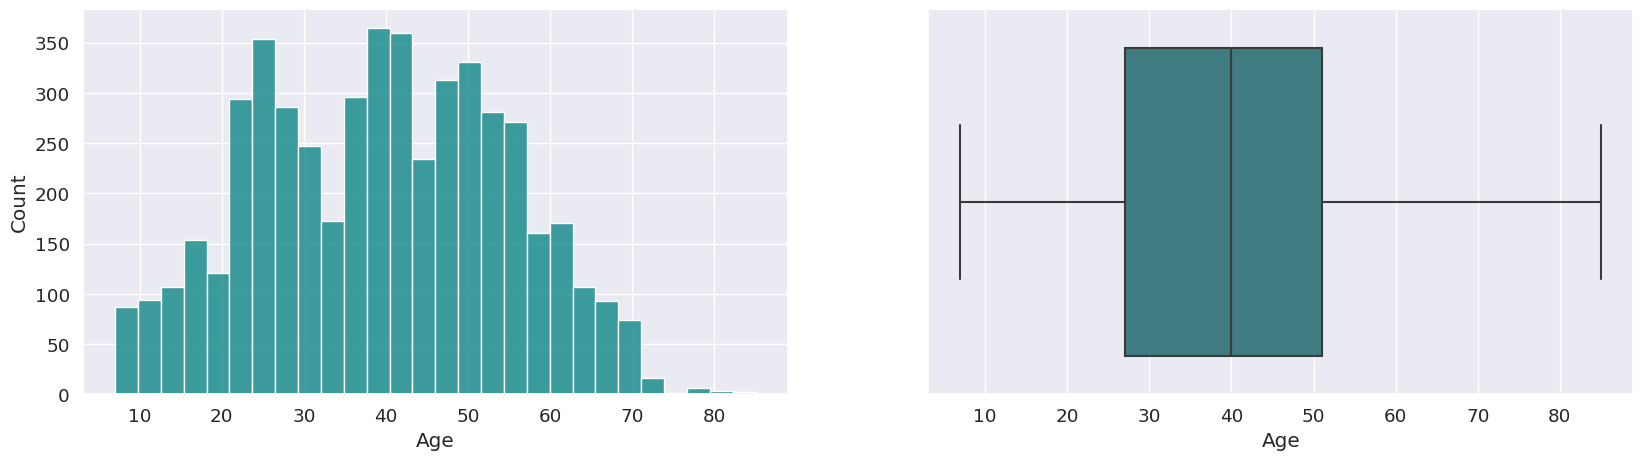

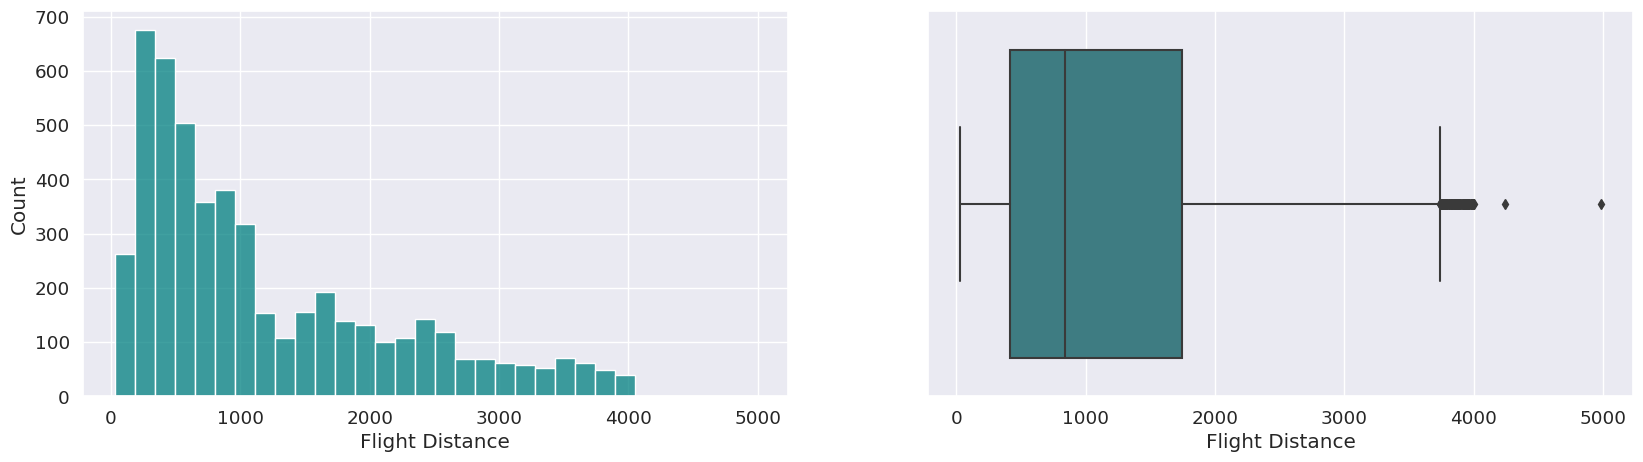

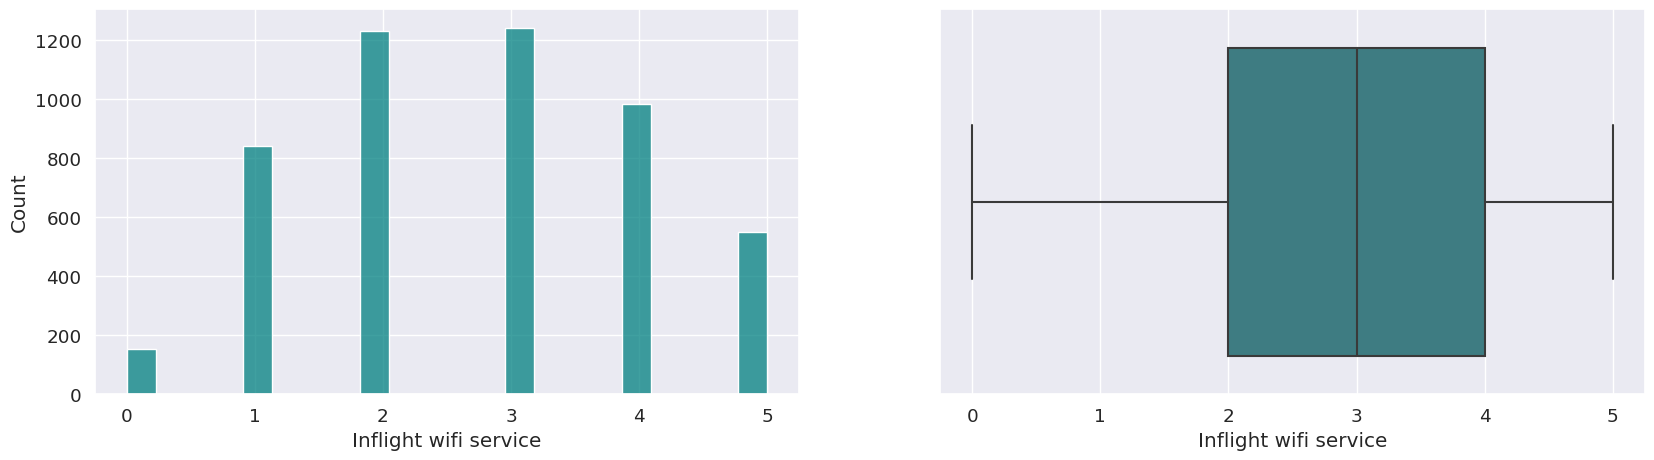

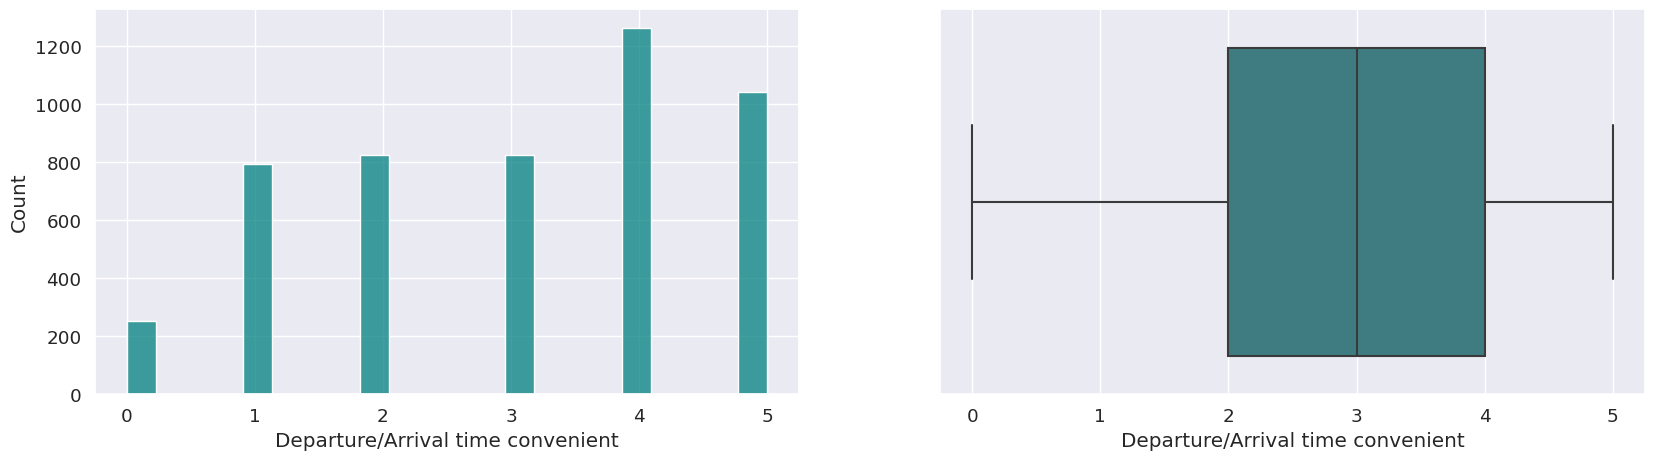

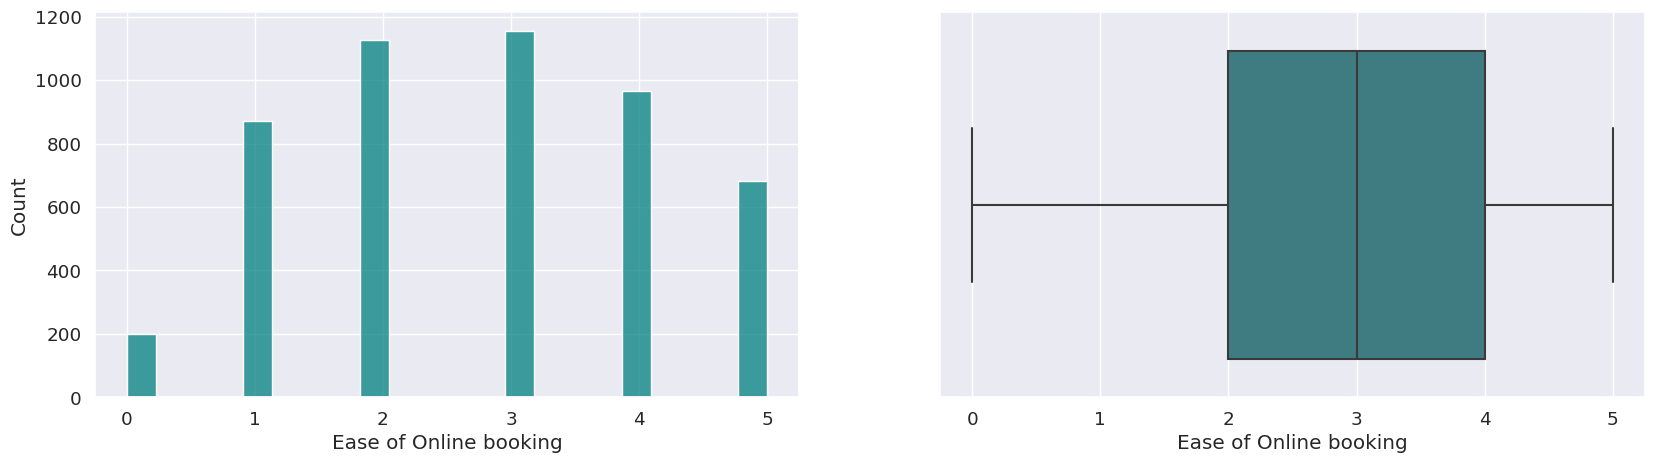

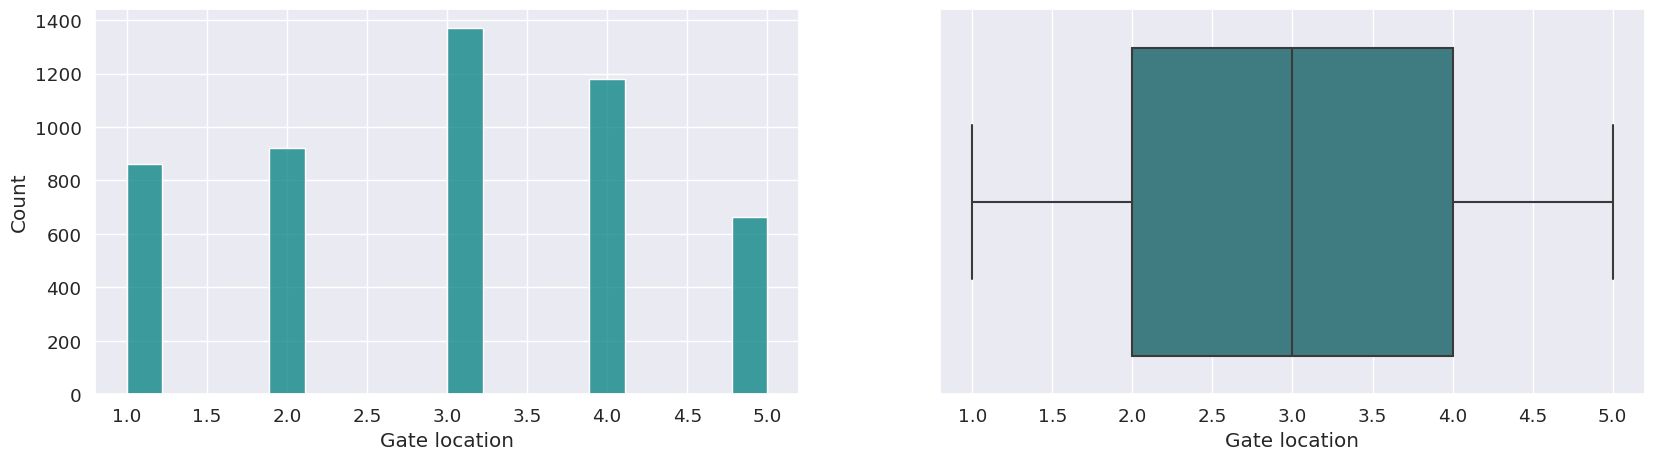

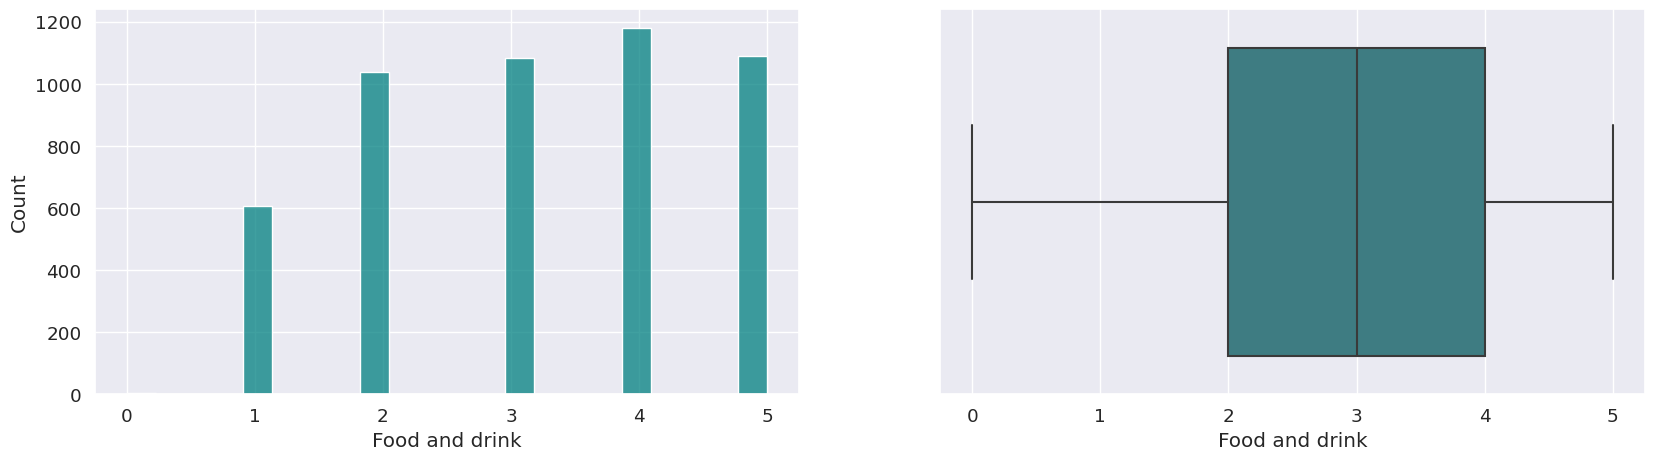

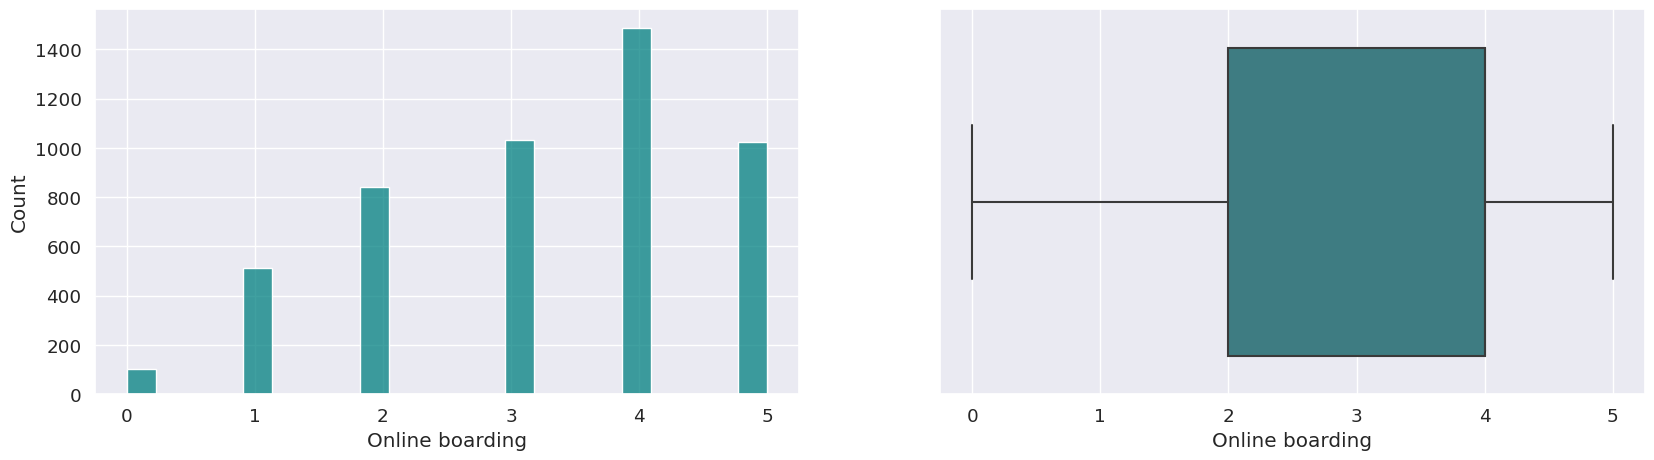

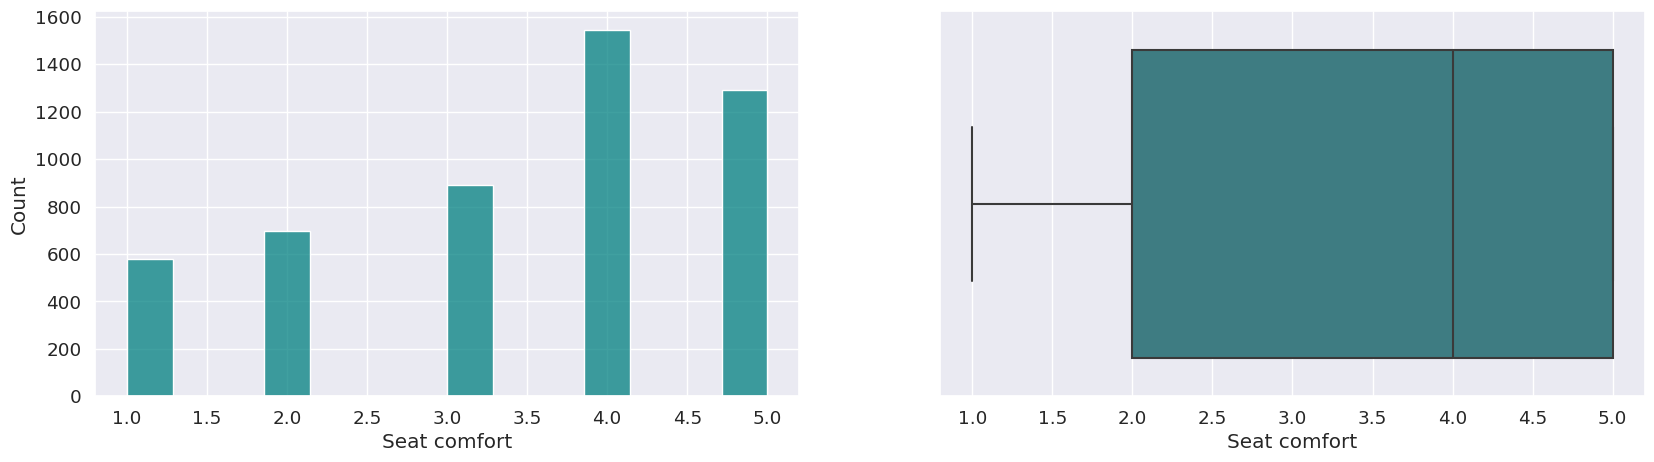

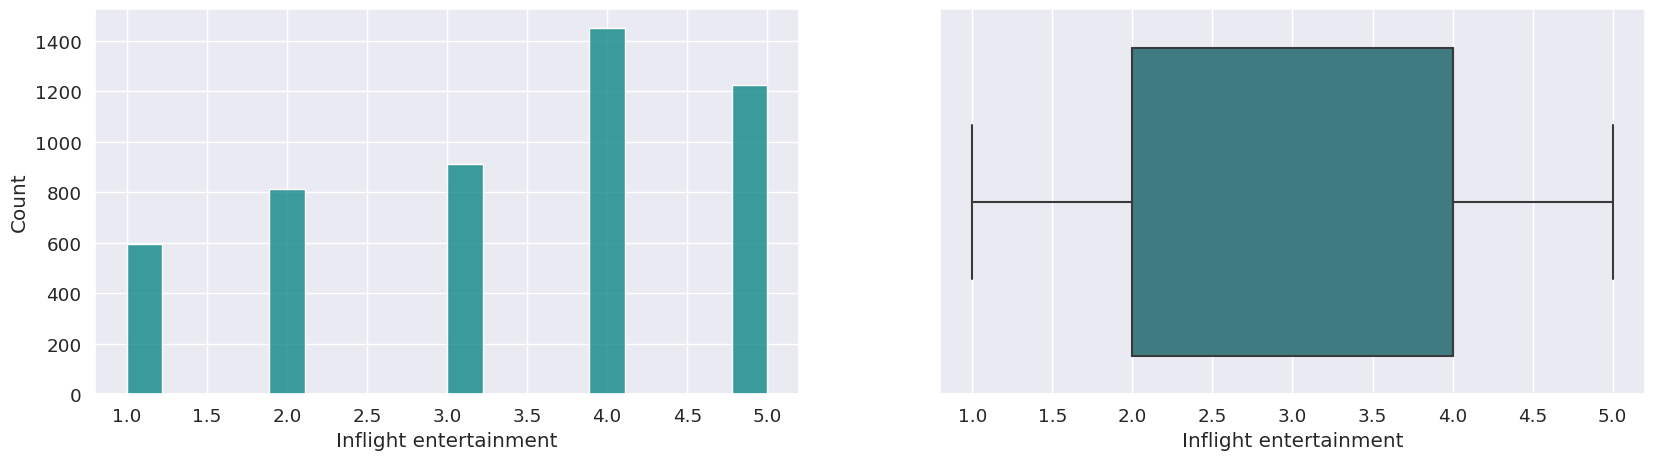

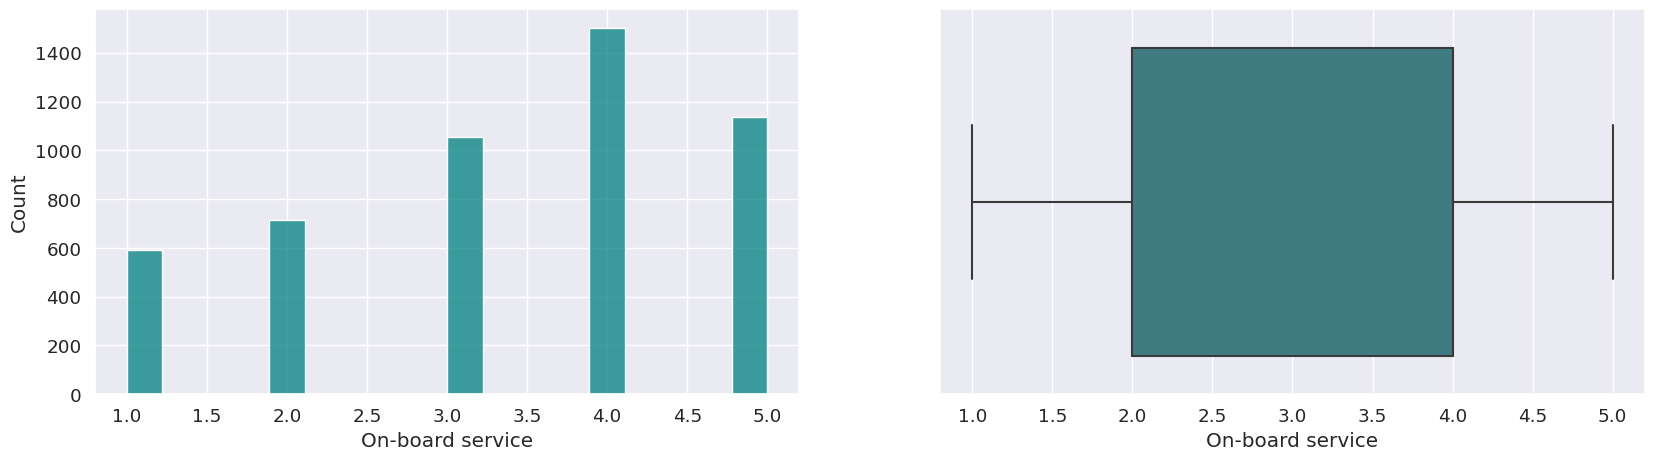

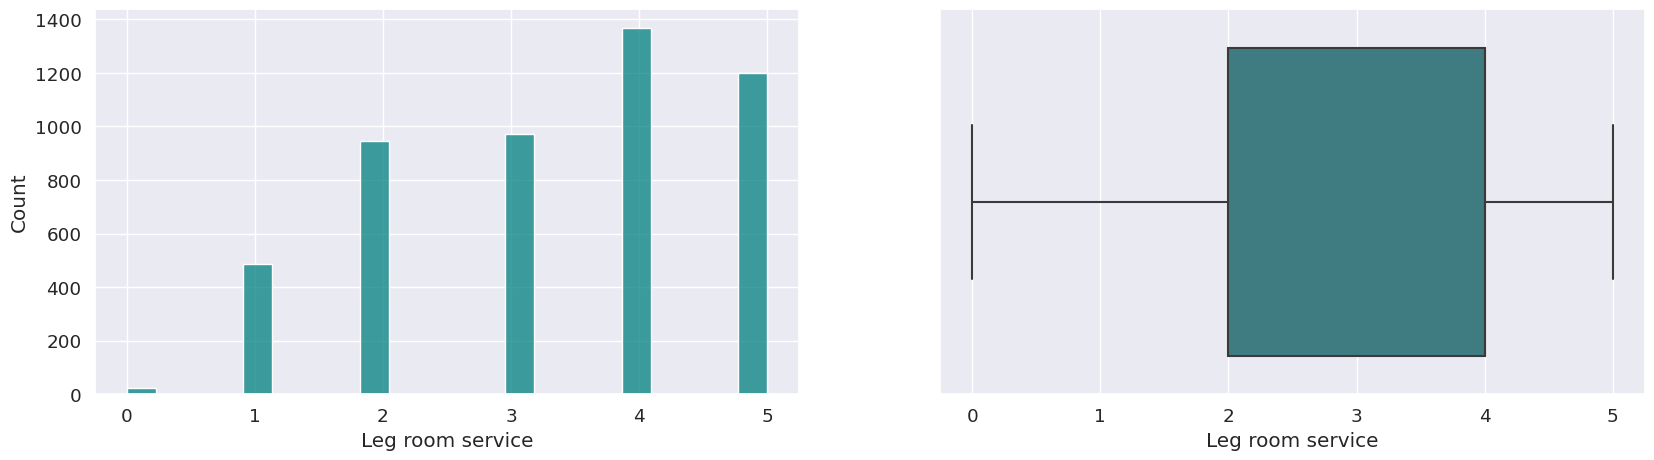

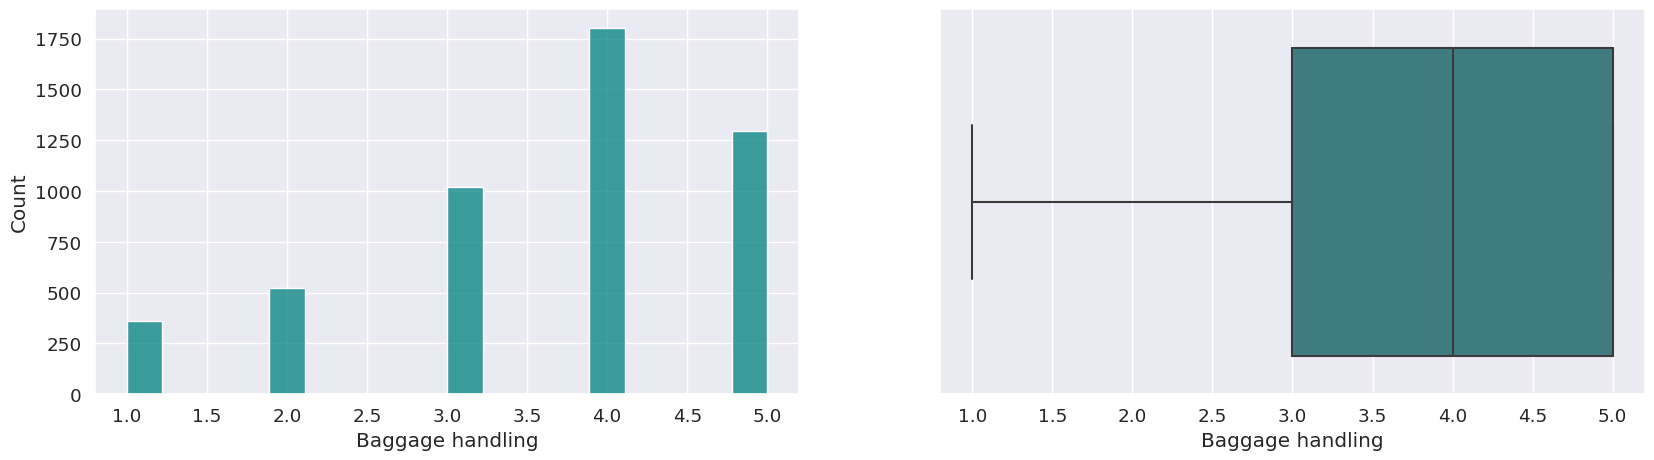

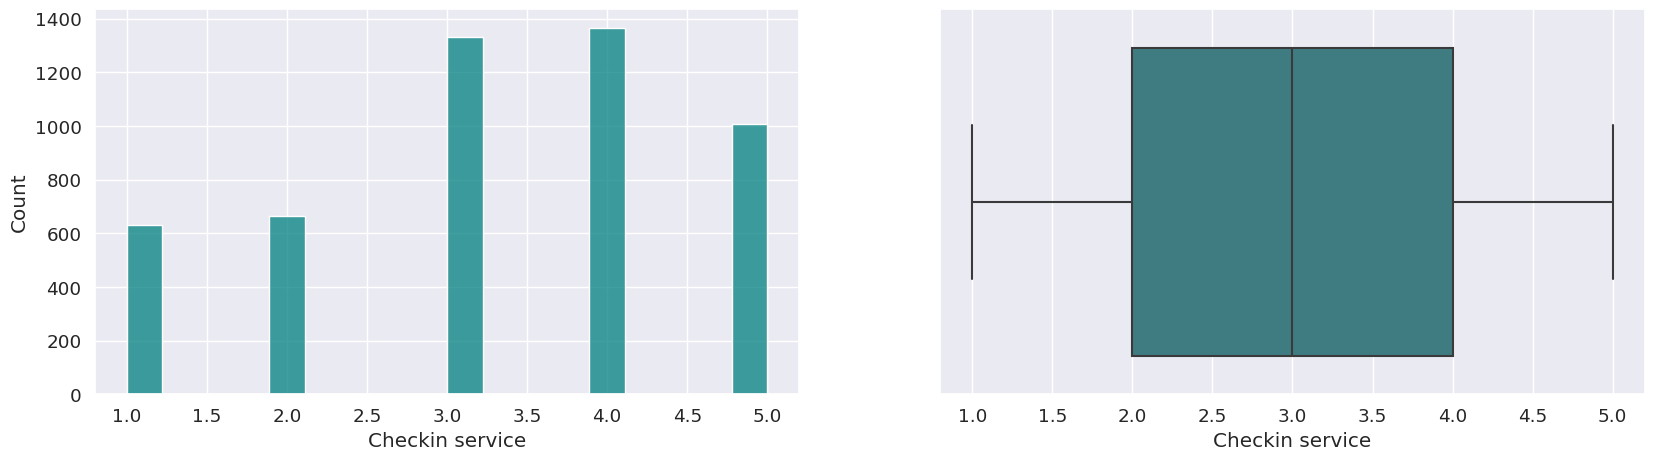

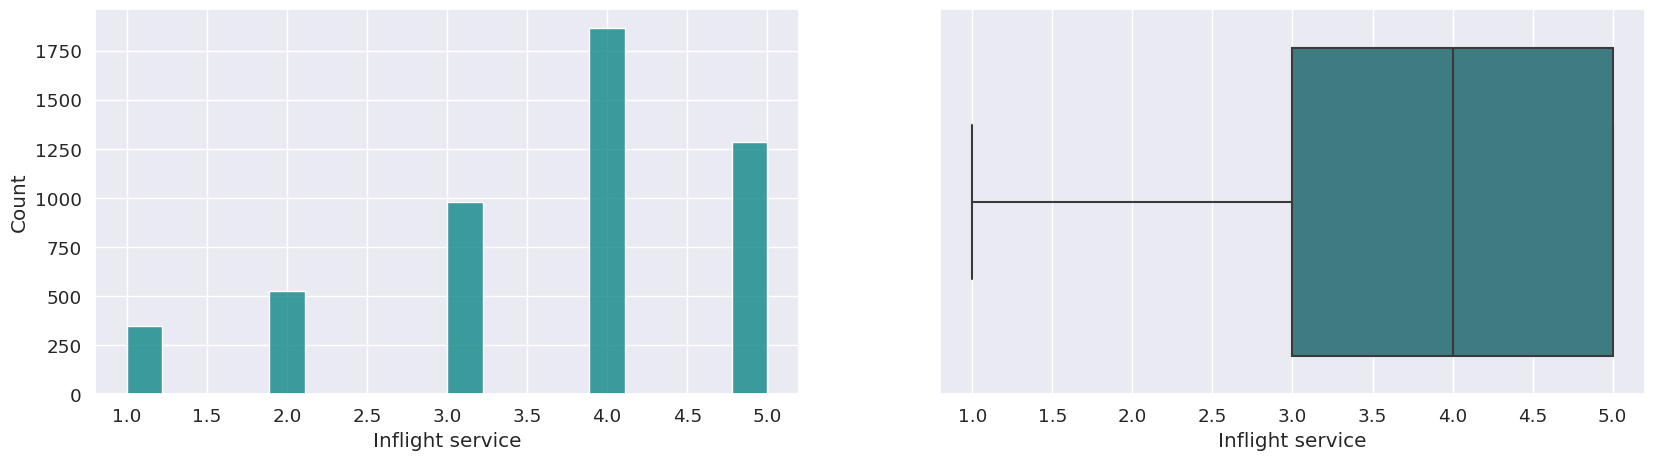

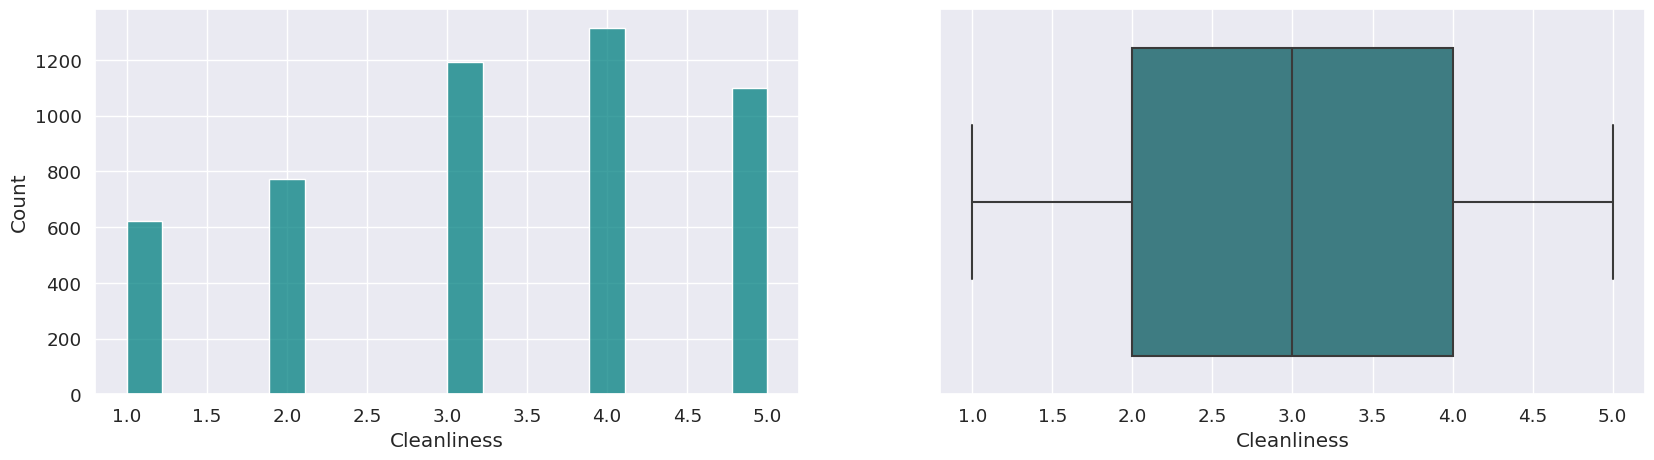

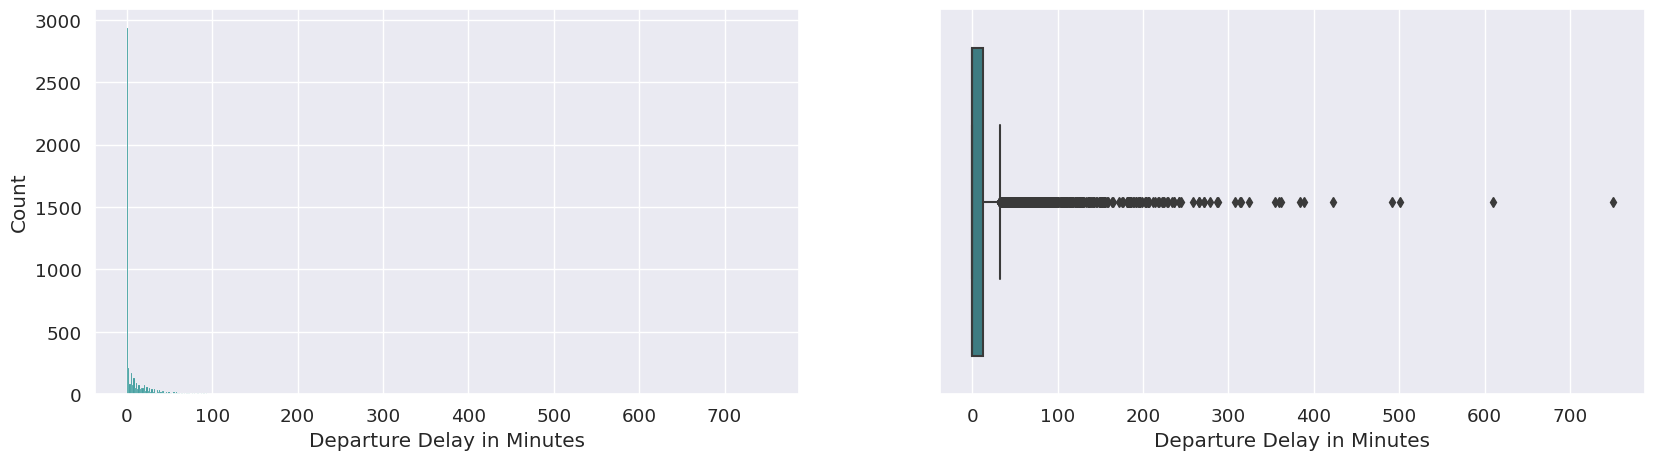

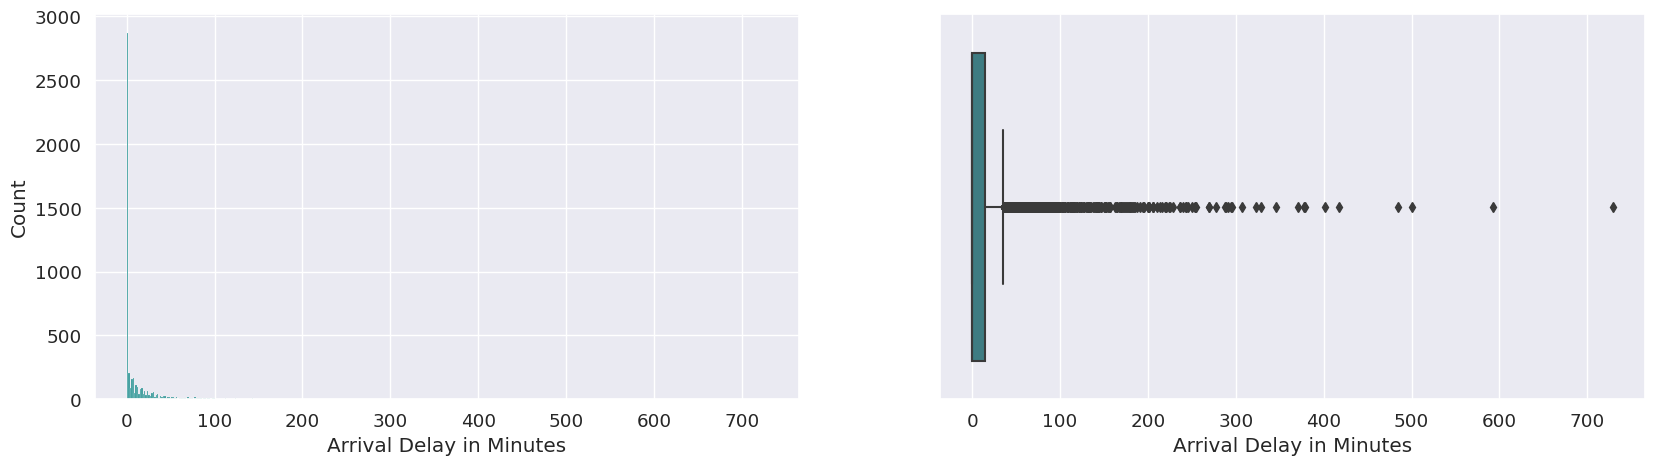

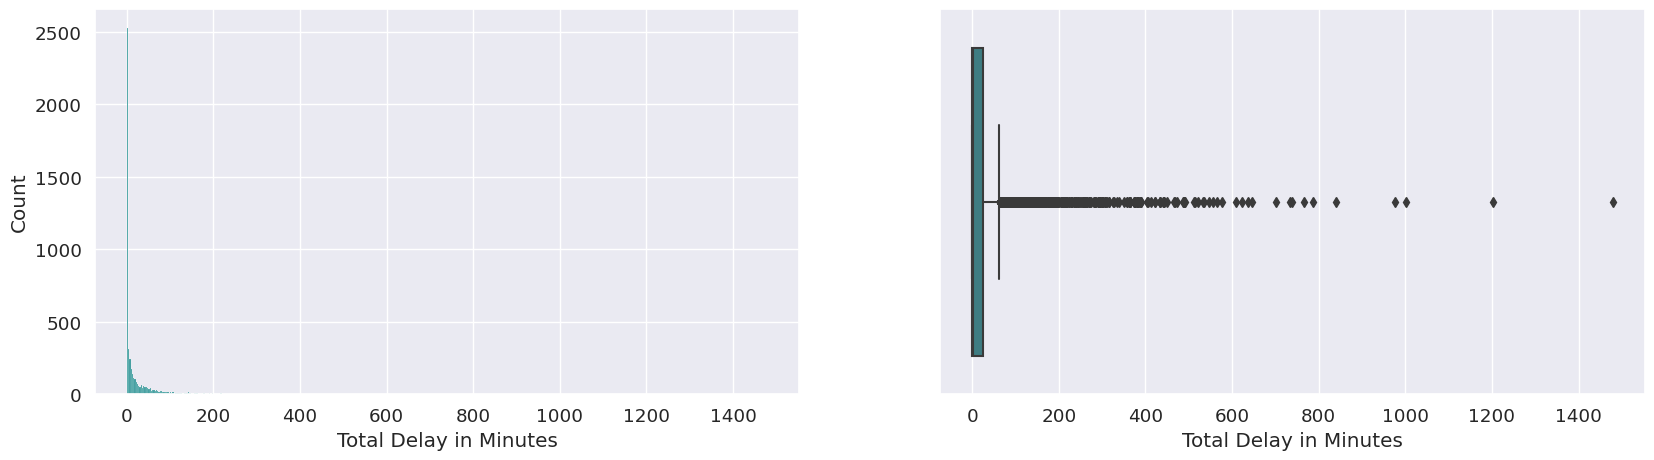

In [15]:
sns.set_context('notebook', font_scale= 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(sample_data[col], ax = ax[0], color= 'teal')
    sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')

Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.

Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

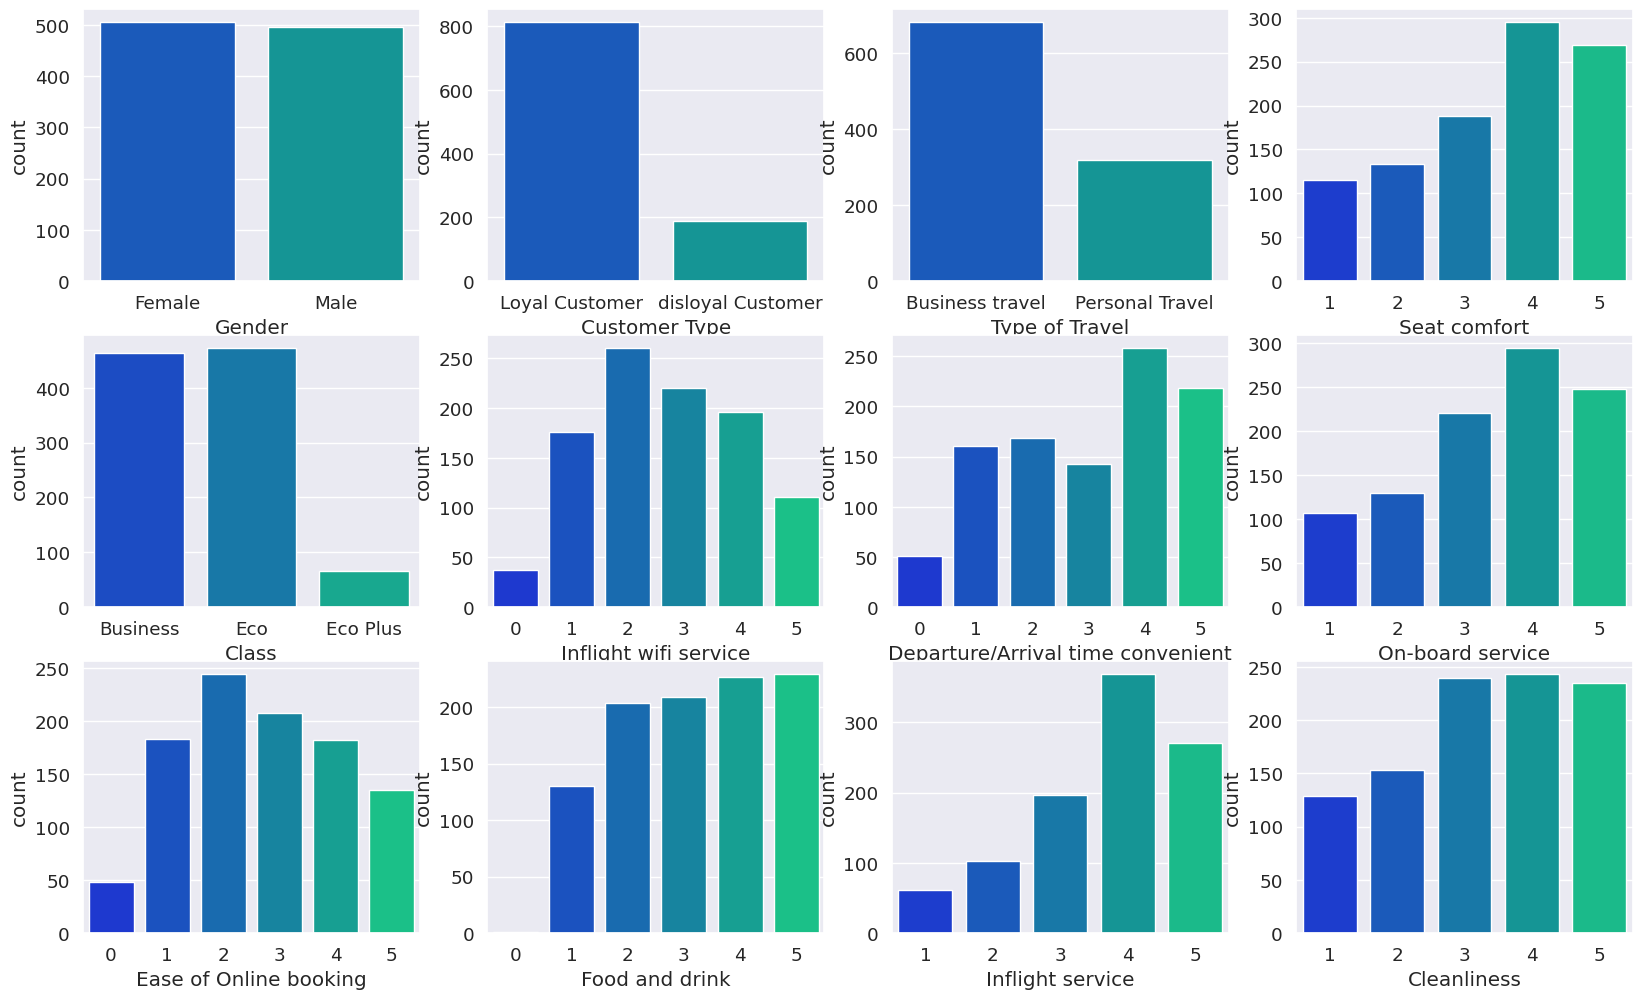

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = sample_data, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = sample_data, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = sample_data, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = sample_data, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = sample_data, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = sample_data, palette= 'winter', ax = axes[2, 3]);

Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.

Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times

<ipython-input-102-32d3a4806a70>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample_data.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")


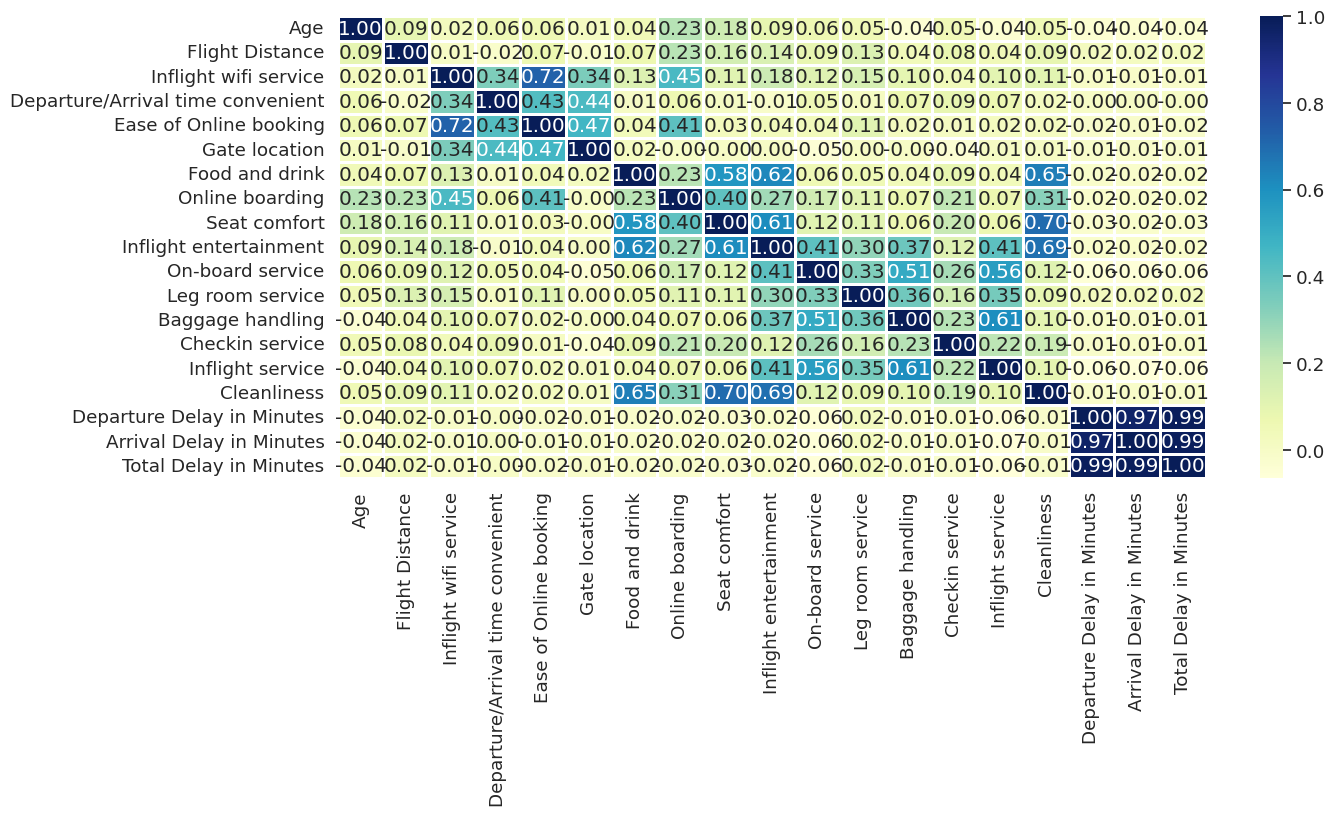

In [ ]:
with sns.axes_style('white'):
    plt.figure(figsize= (14, 6))
    sns.heatmap(sample_data.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")

Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

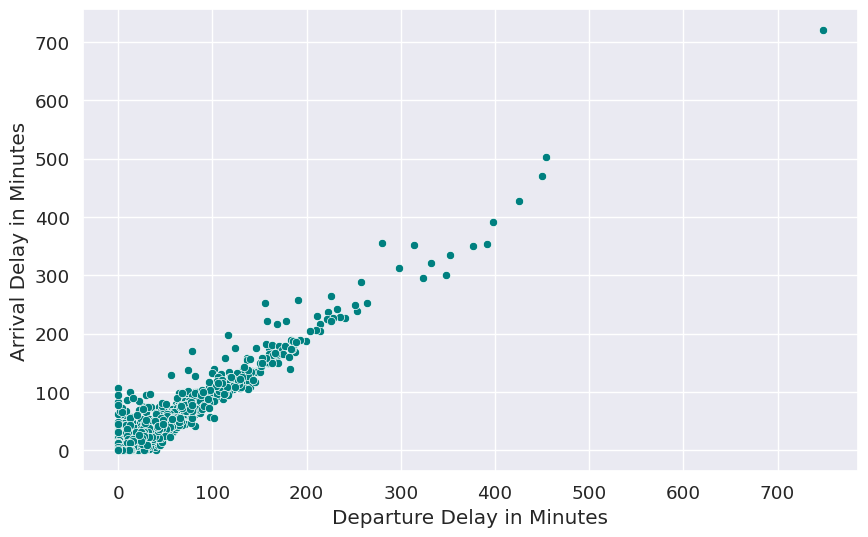

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = sample_data, color = 'teal')
plt.show()

In [ ]:
data.drop('Departure Delay in Minutes', axis=1, inplace= True)
test_data.drop('Departure Delay in Minutes', axis=1, inplace= True)

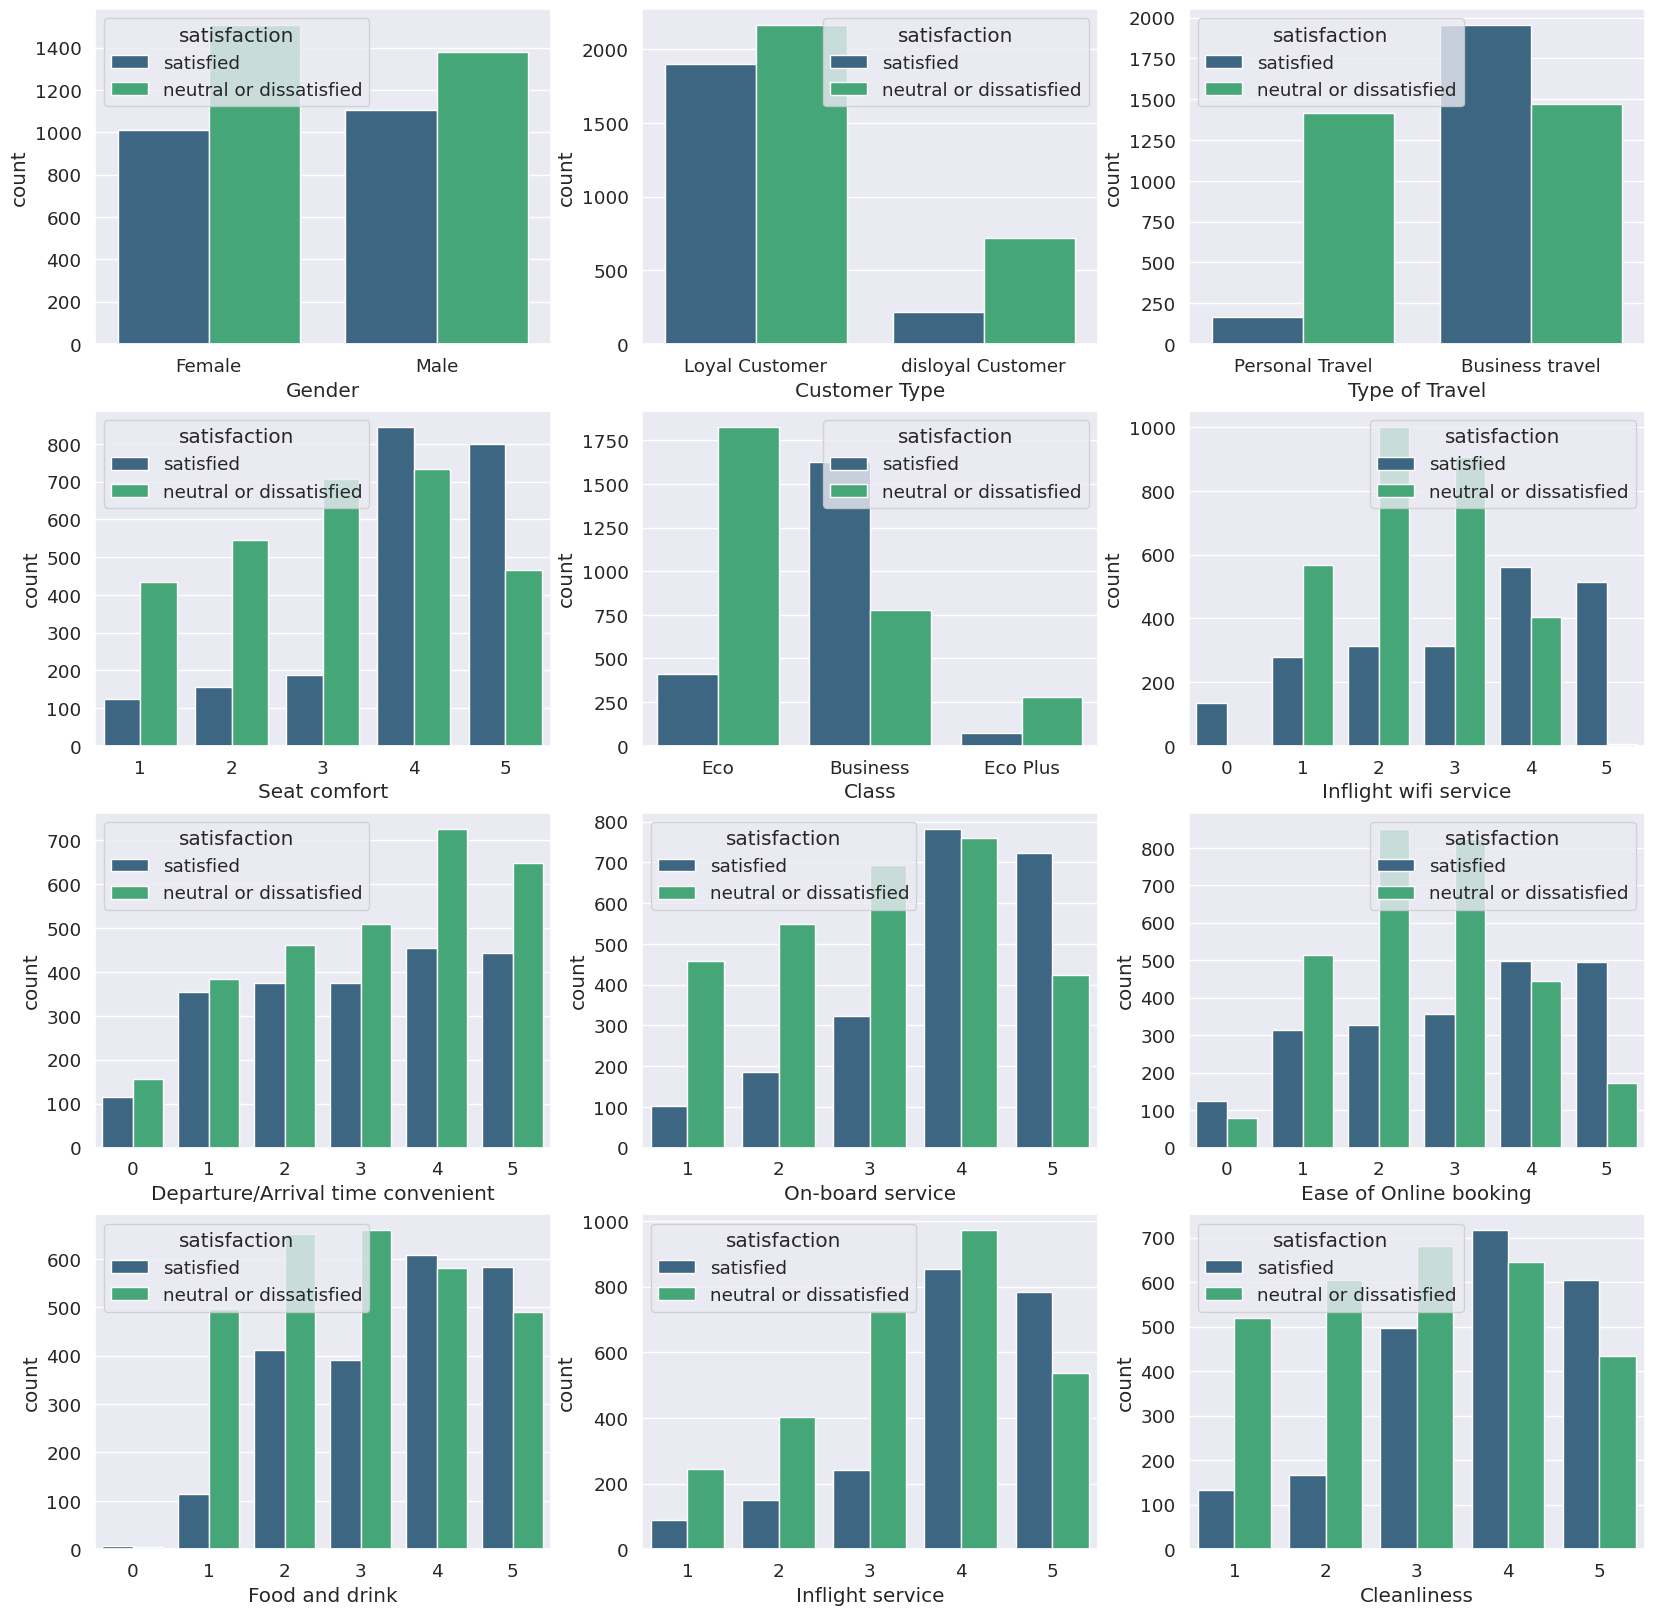

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = sample_data, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2]);

People travelling for business are more satisfied as compared to people who are travelling for other purposes.

Business class people are more satisfied as compared to people travelling in eco class

Majority of people who gave 4 or 5 rating in any of the category were generally satisfied with the airline.

## Sposób 2 

In [16]:
def count(df, col, hue = None, annot = True, ax = None):
    """
    This function plots the count plot for the column given
    arguments:
    df: the data frame
    col: column name
    hue: if you wanted to add a third variable
    annot: to add annotation
    """
    g = sns.countplot(data = df, x = col, hue = hue, palette = "pastel", ax = ax)
    if annot:
        for p in g.patches:
            percent = p.get_height() * 100 / len(df)
            g.annotate(f"{p.get_height()}\n({percent:.2f}%)",(p.get_x() + 0.2, p.get_height()),
                      ha = "center", va = "bottom", color = "black", fontweight = "bold", fontsize = 10,
                      fontname = "monospace")
    # titles
    g.set_title(f"{col} Count Plot", fontsize = 17, fontname = "monospace", fontweight = "bold", pad = 20)
    g.set_xlabel(f"{col}", fontsize = 15, fontname = "monospace", fontweight = "semibold")
    g.set_ylabel("Count", fontsize = 15, fontname = "monospace", fontweight = "semibold")
    
    plt.xticks(fontsize = 12, fontweight = "semibold")
    plt.yticks(fontsize = 12, fontweight = "semibold")

In [17]:
def kde(df, col, ax = None, color = "green", hue = None):
    """
    This function plots the kde for the column given
    It takes three parameters
    First, the data frame
    Second, the column to plot the kde for 
    Third, An Optional argument to specify axis if there was one
    
    """
    
    g = sns.kdeplot(data = df, x = col, shade = True, color = color, ax = ax, hue = hue)
        
    # titles
    g.set_title(f"kde plot for column {col}", fontsize = 17, weight = "bold", fontname = "monospace", pad = 20)
    g.set_xlabel(col, fontsize = 15, weight = "semibold", fontname = "monospace")
    g.set_ylabel("Density", fontsize = 15, weight = "semibold", fontname = "monospace")
    
    plt.xticks(fontsize = 12, fontweight = "semibold")
    plt.yticks(fontsize = 12, fontweight = "semibold")
    plt.show()

In [18]:
def scatter(df, x, y, ax = None, hue = None, size = None, style = None, alpha = 1):
    """
    This function allows you to plot the scatter plot of 2 variables
    ---
    arguments:
    df: data frame name.
    x: column name to x-axis.
    y: column name to y-axis.
    ax: if there's more than one.
    hue: to add another variable using color.
    size: to add another variable using size.
    style: to add another variable using style.
    """
    g = sns.scatterplot(data = df, x = x, y = y, ax  = ax , hue = hue,
                    size = size, style = style, markers = True, alpha = alpha)
    
    # titles
    g.set_title(f"{x} with {y}", fontsize = 17, weight = "bold", fontname = "monospace", pad = 20)
    g.set_xlabel(x, fontsize = 15, weight = "semibold", fontname = "monospace")
    g.set_ylabel(y, fontsize = 15, weight = "semibold", fontname = "monospace")
    
    plt.xticks(fontsize = 12, fontweight = "semibold")
    plt.yticks(fontsize = 12, fontweight = "semibold")
    plt.show()

### Gender

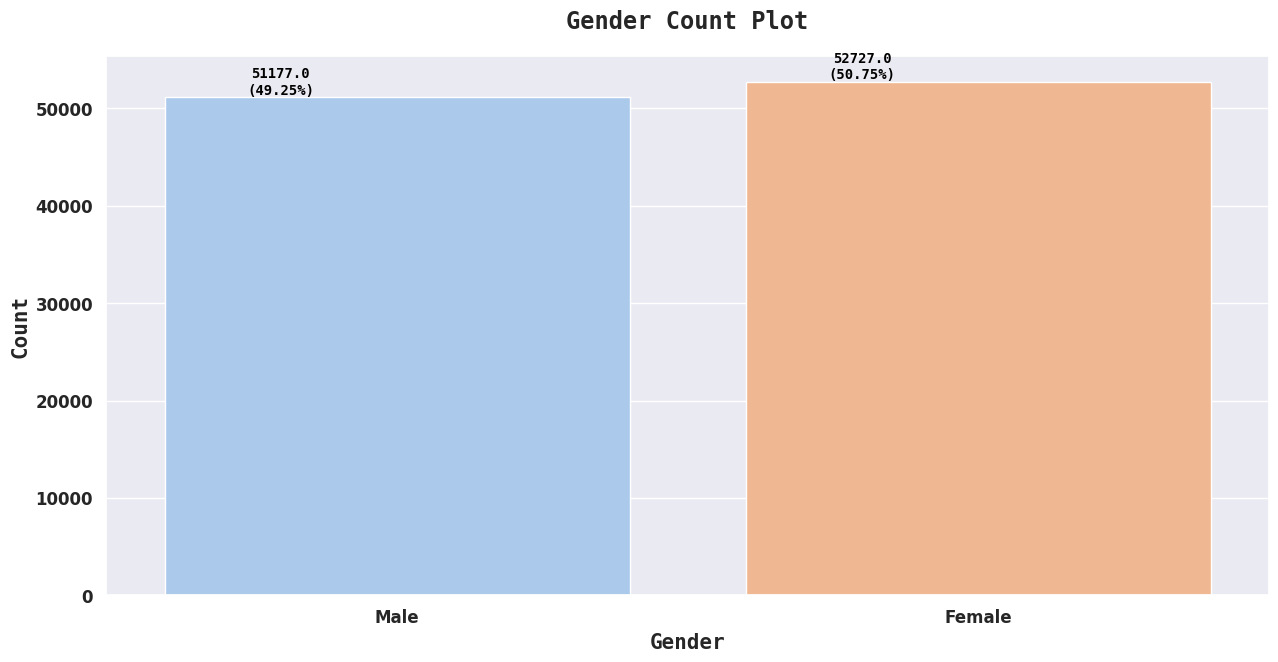

In [19]:
count(data, "Gender")

Close numbers between males and females.

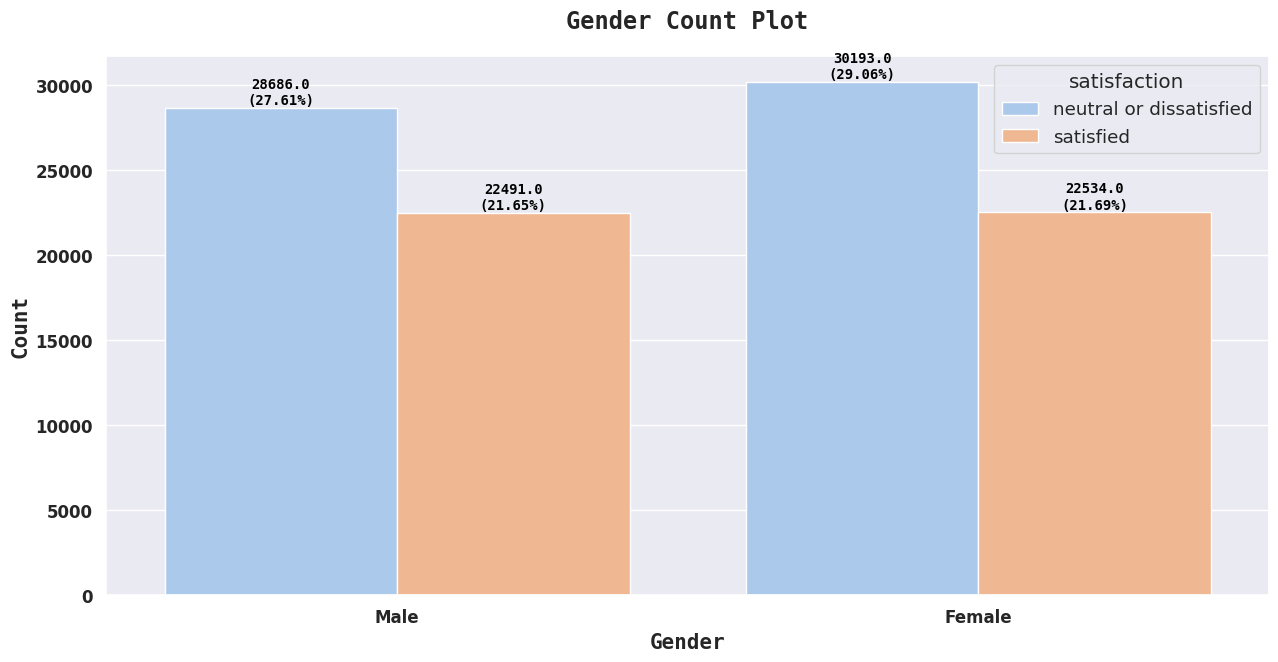

In [20]:
count(data, "Gender", hue = "satisfaction")

Doesn't seem to be a relation between gender and satisfaction.

### Age

<ipython-input-51-e456fdb0ee4a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data = df, x = col, shade = True, color = color, ax = ax, hue = hue)


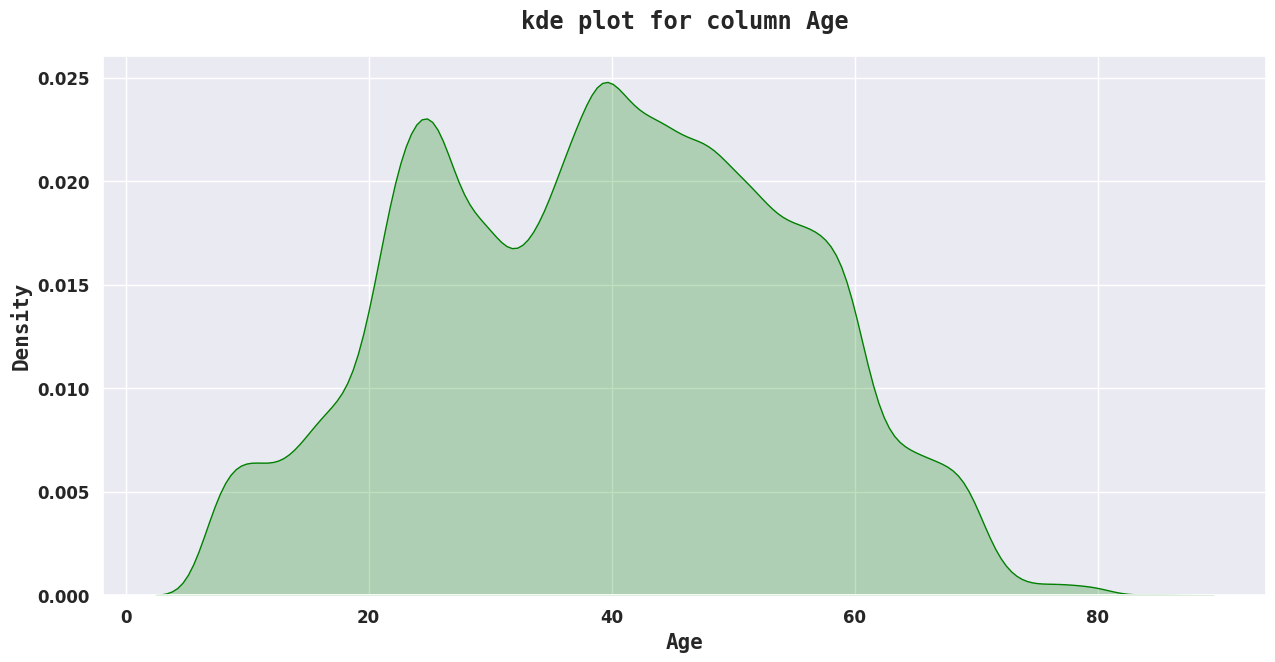

In [ ]:
kde(data, "Age")

All kind of age people ae participating in the survey but people of age near 25 and 40 years are travelling more.

Looks like that the distribution is quite symmetric.
Most people are about 40 years old.

Można dodać tak jak tu - treske
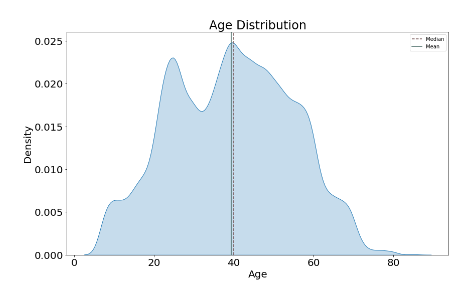

<ipython-input-51-e456fdb0ee4a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data = df, x = col, shade = True, color = color, ax = ax, hue = hue)


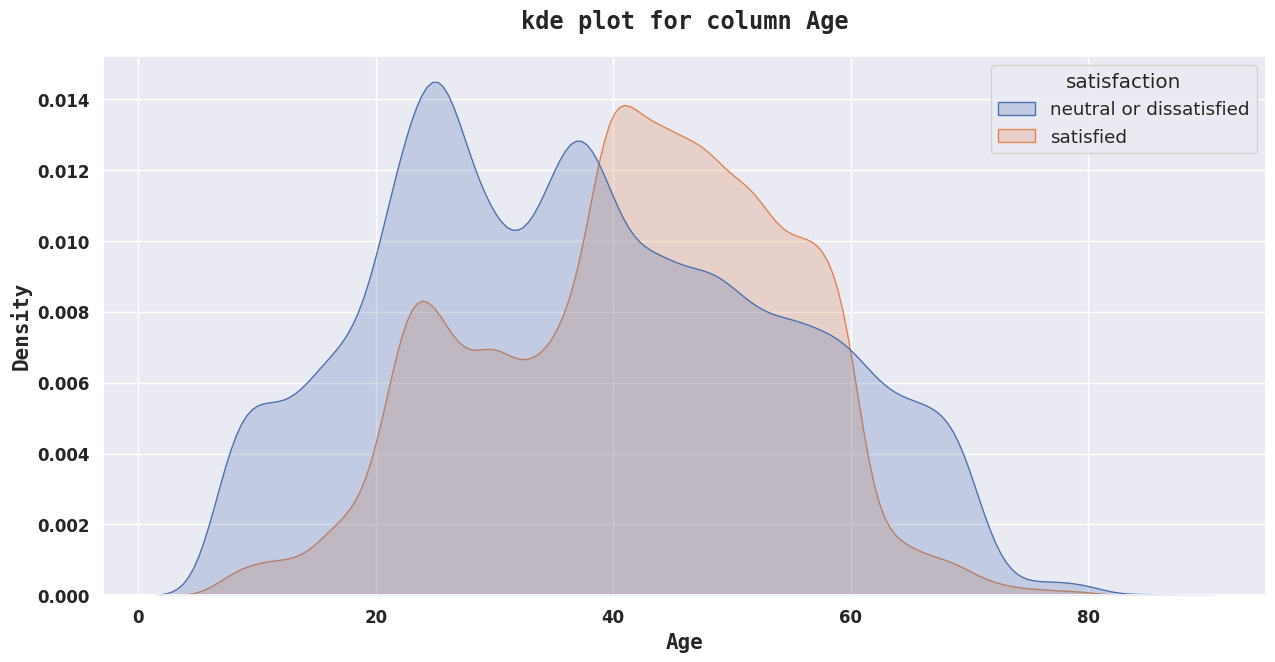

In [ ]:
kde(data, "Age", hue = "satisfaction")

Maybe we can say that satisfied people are bigger that unsatisfied.

Satisfied people are about 40-56 years old. Unsatisfied are about 20-40 years old

### Customer Type

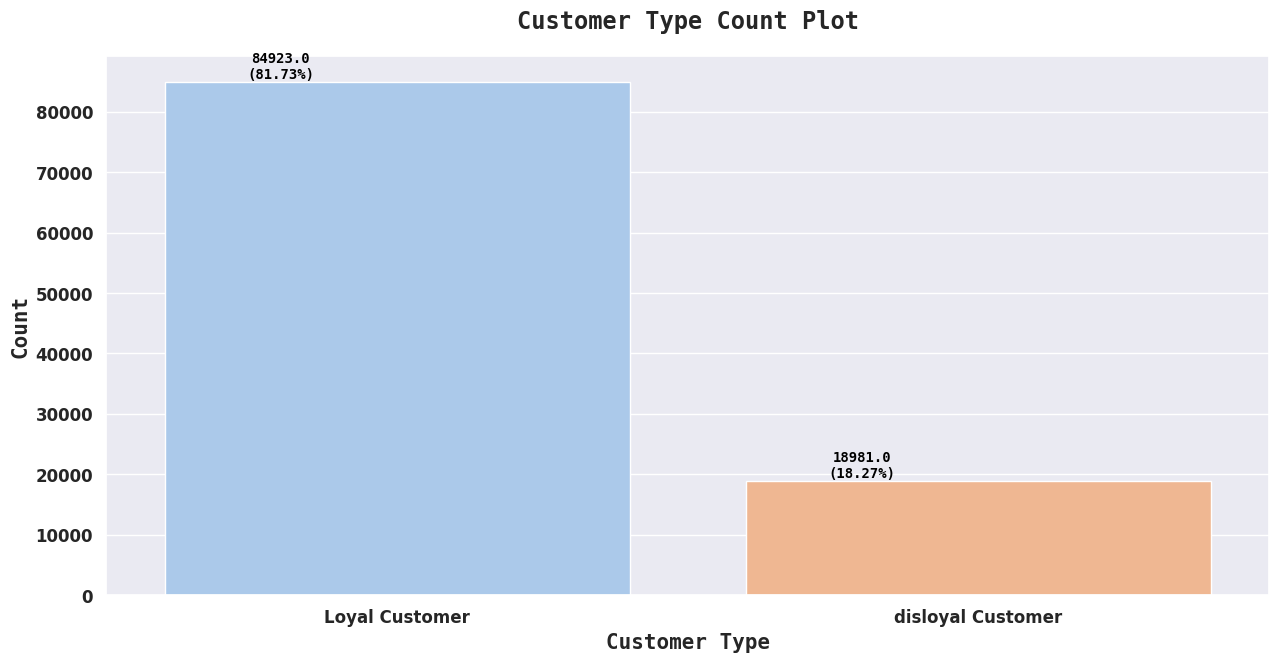

In [ ]:
count(data, "Customer Type")

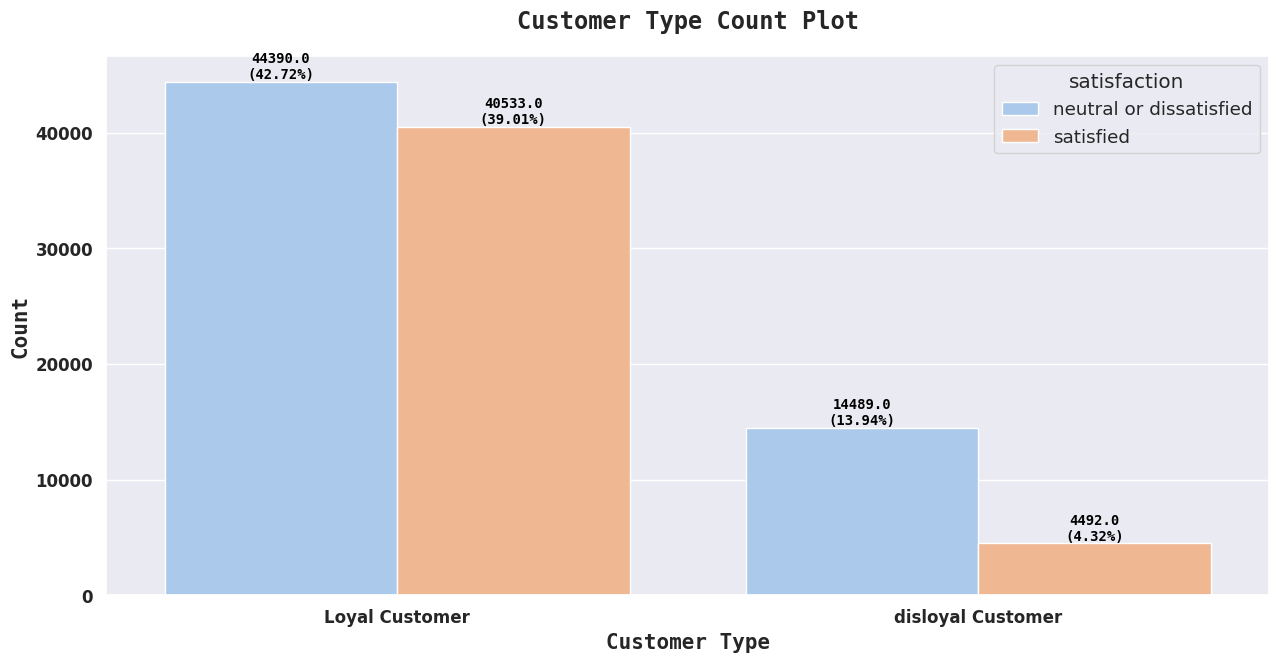

In [ ]:
count(data, "Customer Type", hue = "satisfaction")

### Type of Travel

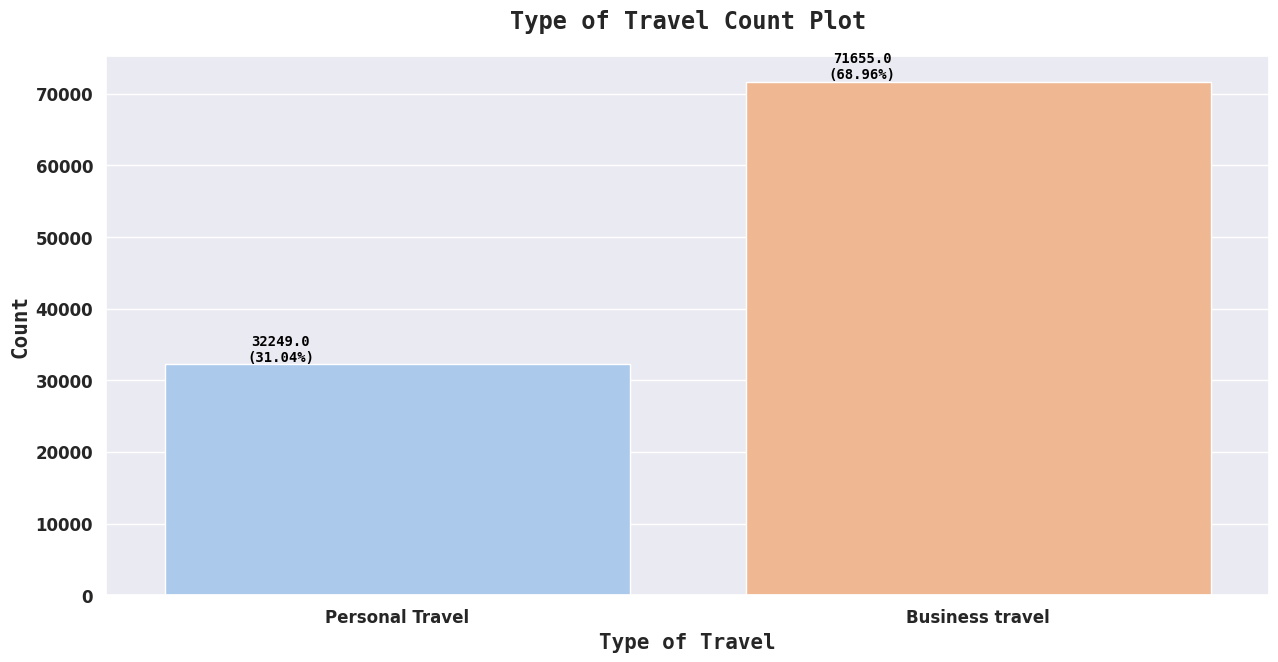

In [ ]:
count(data, "Type of Travel")

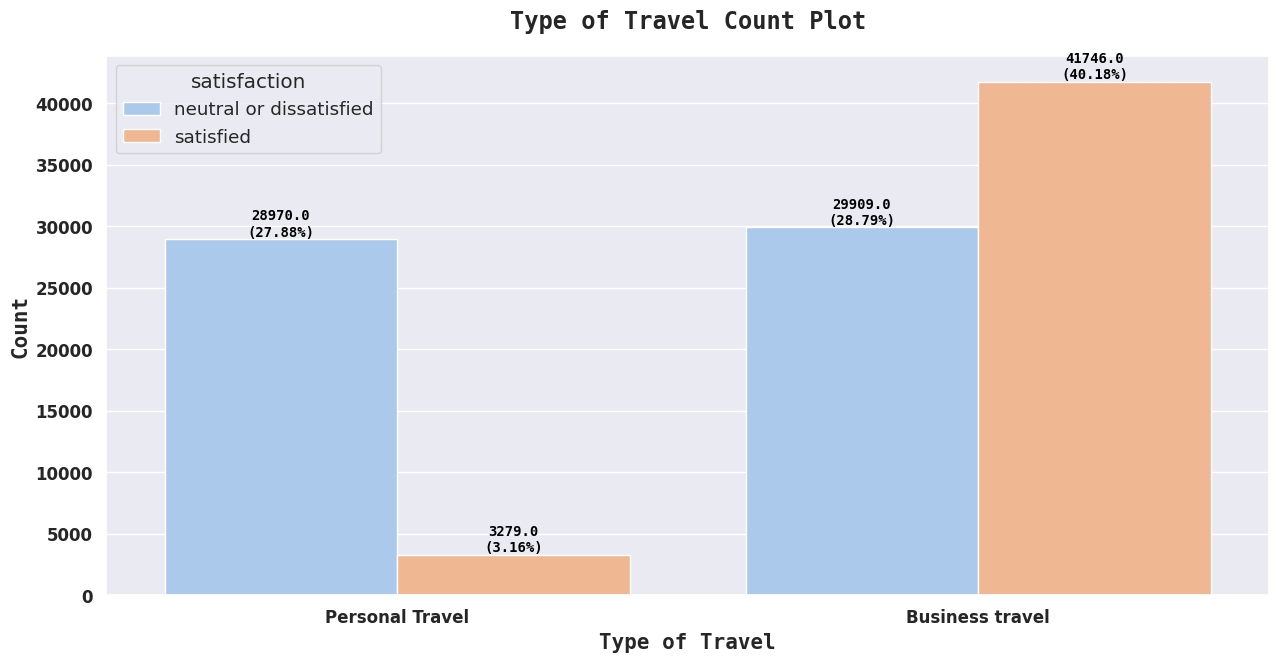

In [ ]:
count(data, "Type of Travel", hue = "satisfaction")

Personal travels has a big effect.
Most of Personal travels are unsatisfied people.

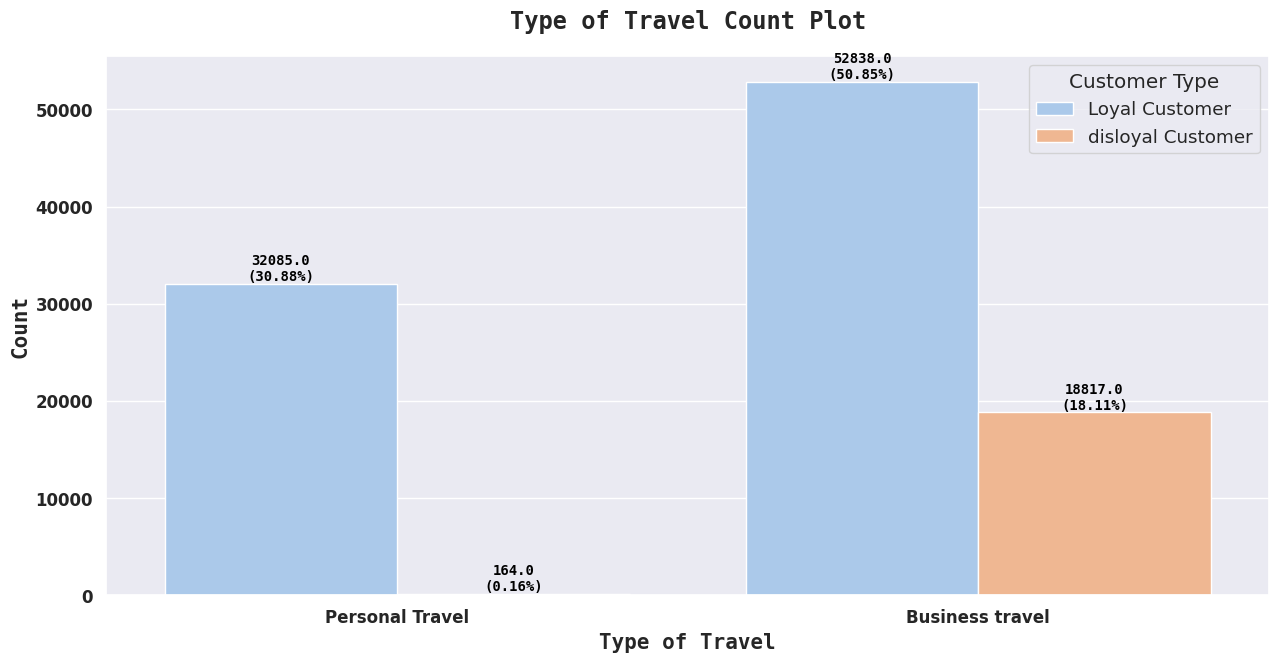

In [ ]:
count(data, "Type of Travel", hue = "Customer Type")

Approximately all of Personal travels are Returning.

We can also say that most of First time travels are business travels.

### Class

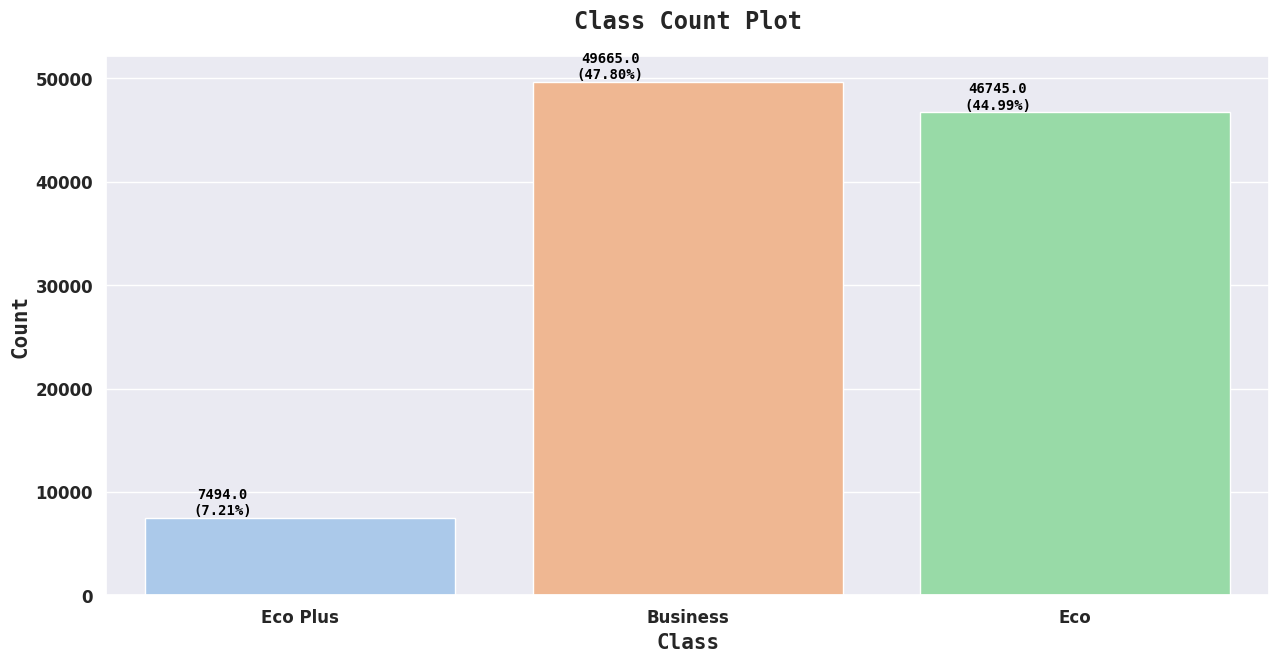

In [ ]:
count(data, "Class")

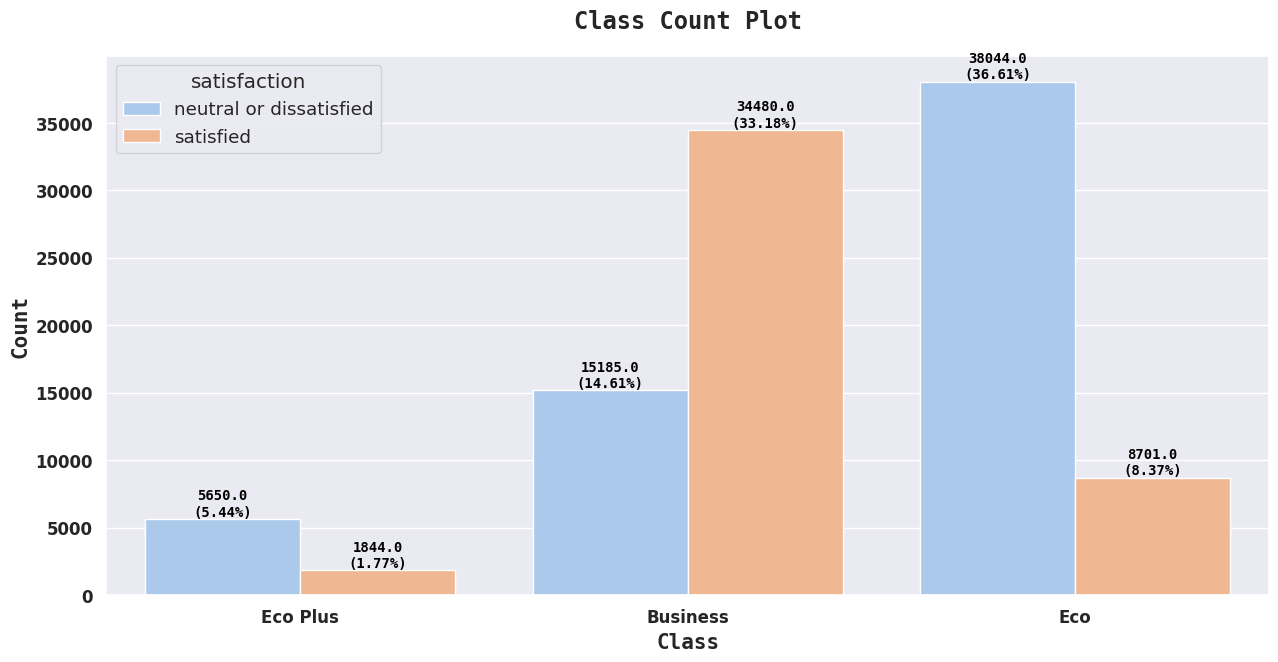

In [ ]:
count(data, "Class", hue = "satisfaction")

Well okay we can notice that Economy class has a lot of unsatisfied people..

Most of Economy plus are unsatisfied too.

Business class on the other hand have a majority of satisfied people.

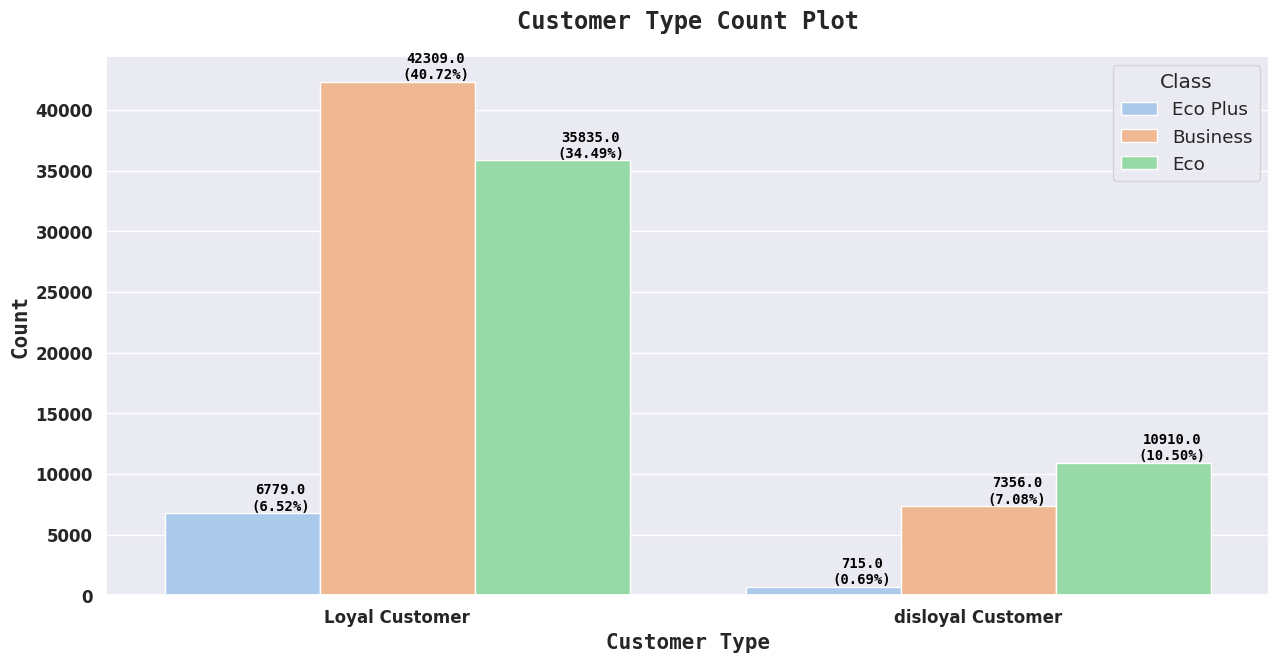

In [ ]:
count(data,"Customer Type", hue = "Class")

Most of Returning travesl are Business class.

Most of First-time travels are Economy class.

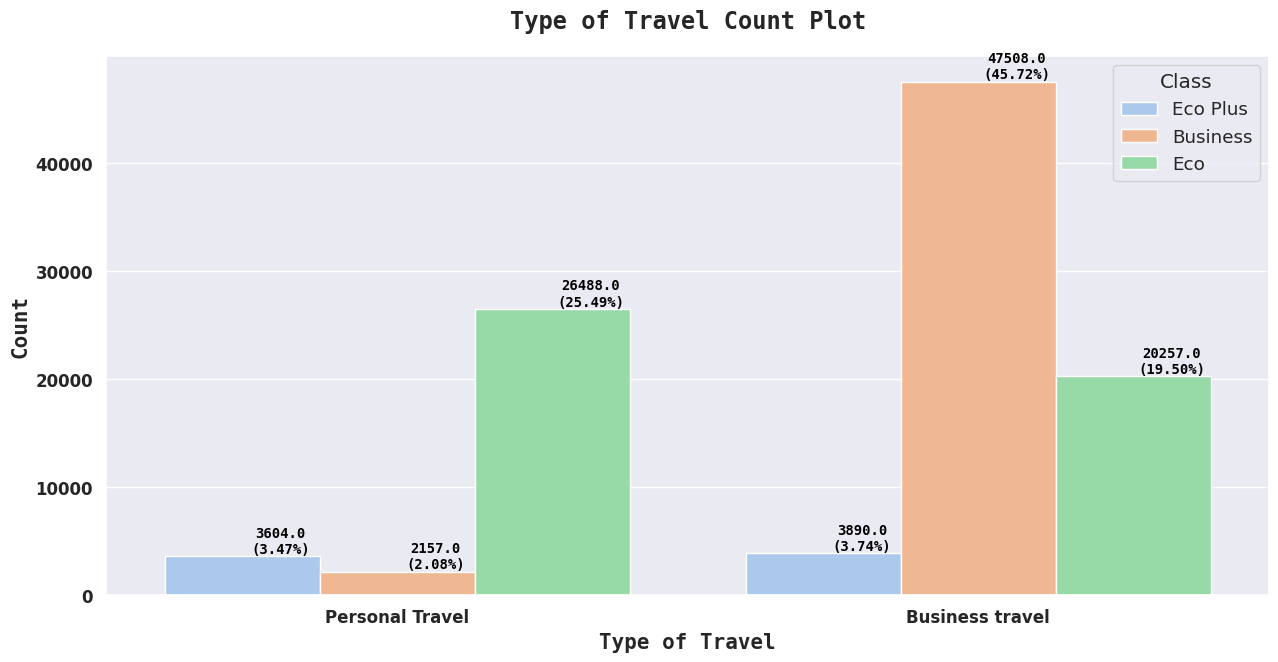

In [ ]:
count(data,"Type of Travel", hue = "Class")

Here we can notice that the majority of Personal travels take ecomomy class.

This actually agrees with the fact that both personal travels and Encomoy class have a lot of unsatisfied people.

On the other hand, most of Business travels take business class.

### Flight Distance

<ipython-input-51-e456fdb0ee4a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data = df, x = col, shade = True, color = color, ax = ax, hue = hue)


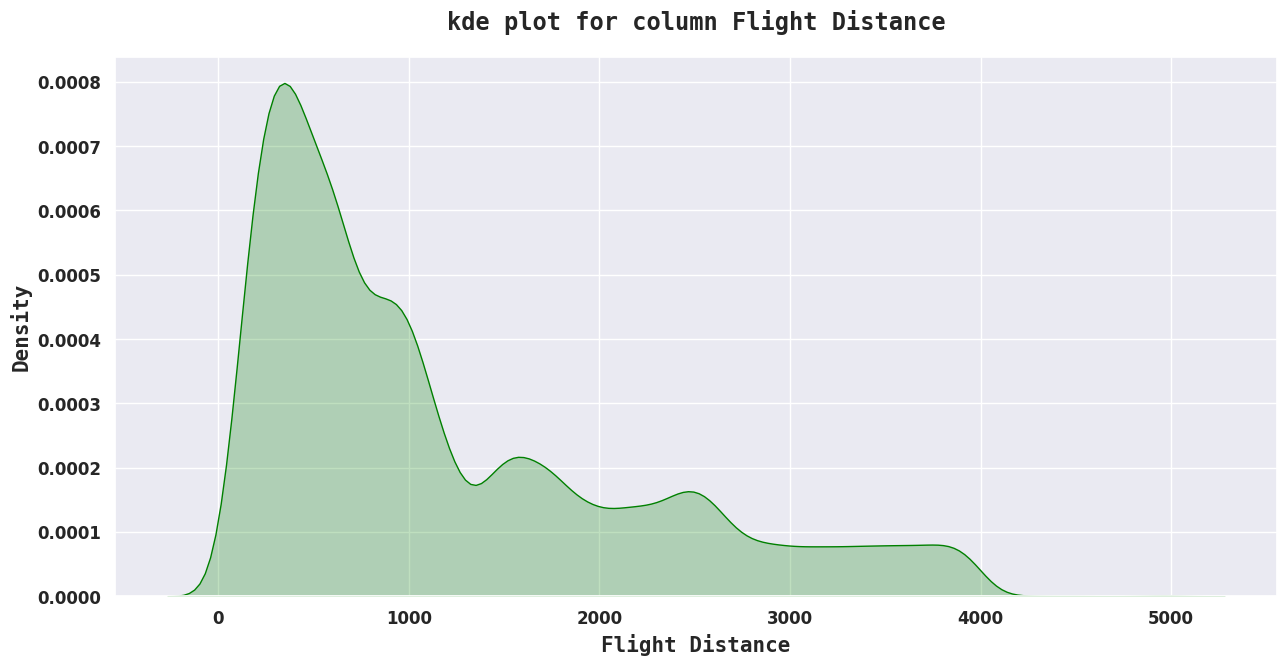

In [ ]:
kde(data, "Flight Distance")

Most travels were about 500 unit distance.

<ipython-input-51-e456fdb0ee4a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data = df, x = col, shade = True, color = color, ax = ax, hue = hue)


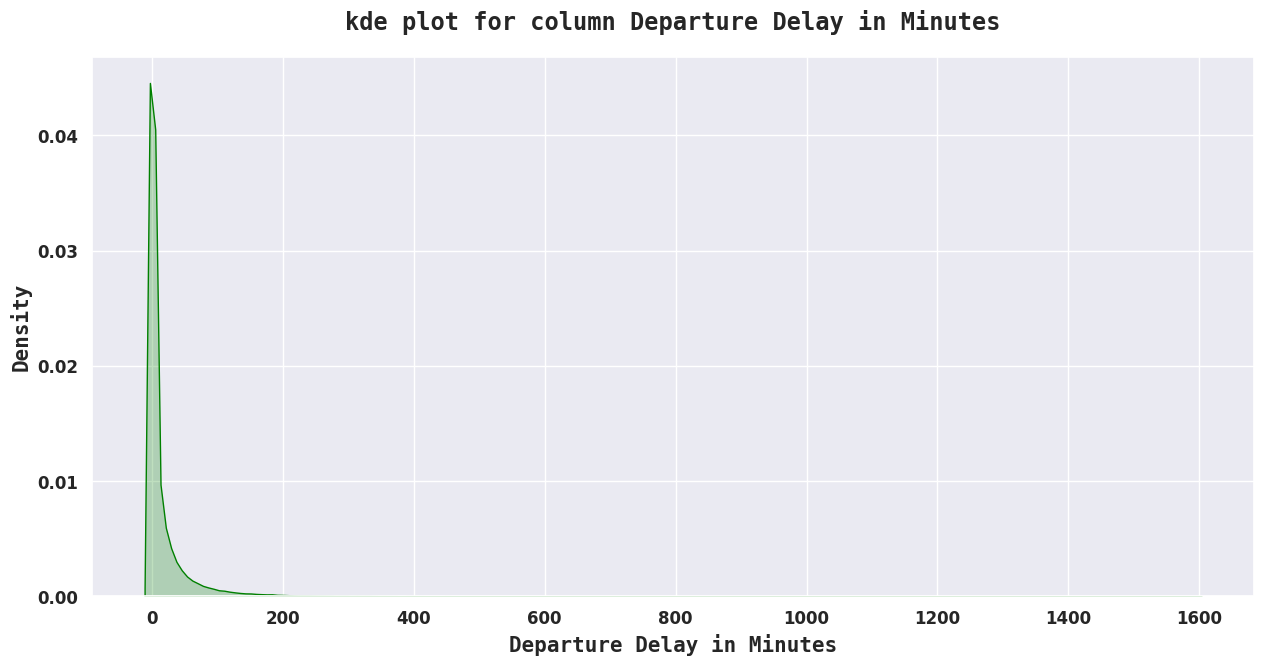

In [ ]:
kde(data, "Departure Delay in Minutes")

Seems that most cases had no Departure Delay.

### Arrival Delay

<ipython-input-51-e456fdb0ee4a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data = df, x = col, shade = True, color = color, ax = ax, hue = hue)


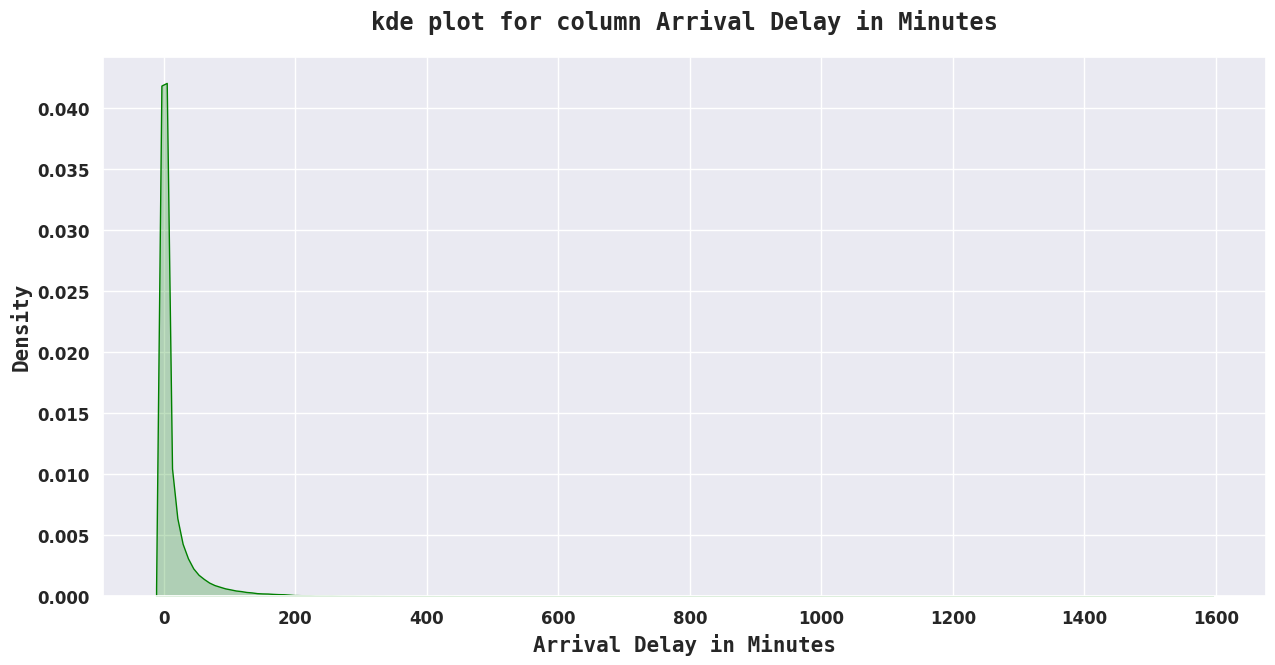

In [ ]:
kde(data, "Arrival Delay in Minutes")

Just like Departuer Delay

Most cases had no Arrival Delay.

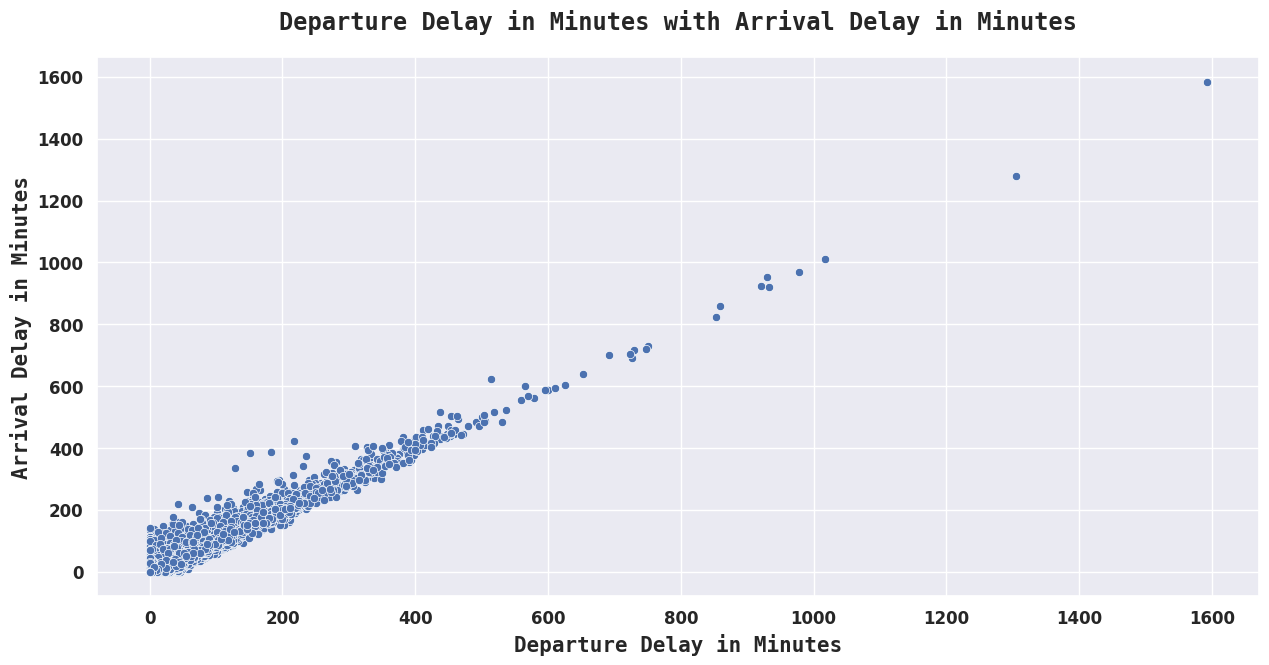

In [ ]:
scatter(data, x = "Departure Delay in Minutes", y = "Arrival Delay in Minutes")

As expected, Departure Delay affects Arrival Delay with a strong correlation.

We can also notice that Departure Delay is approximately equal to Arrival Delay. That tells

us that the delay happens only before the start of the flight (not during the flight).



### Departure and Arrival Time Convenience

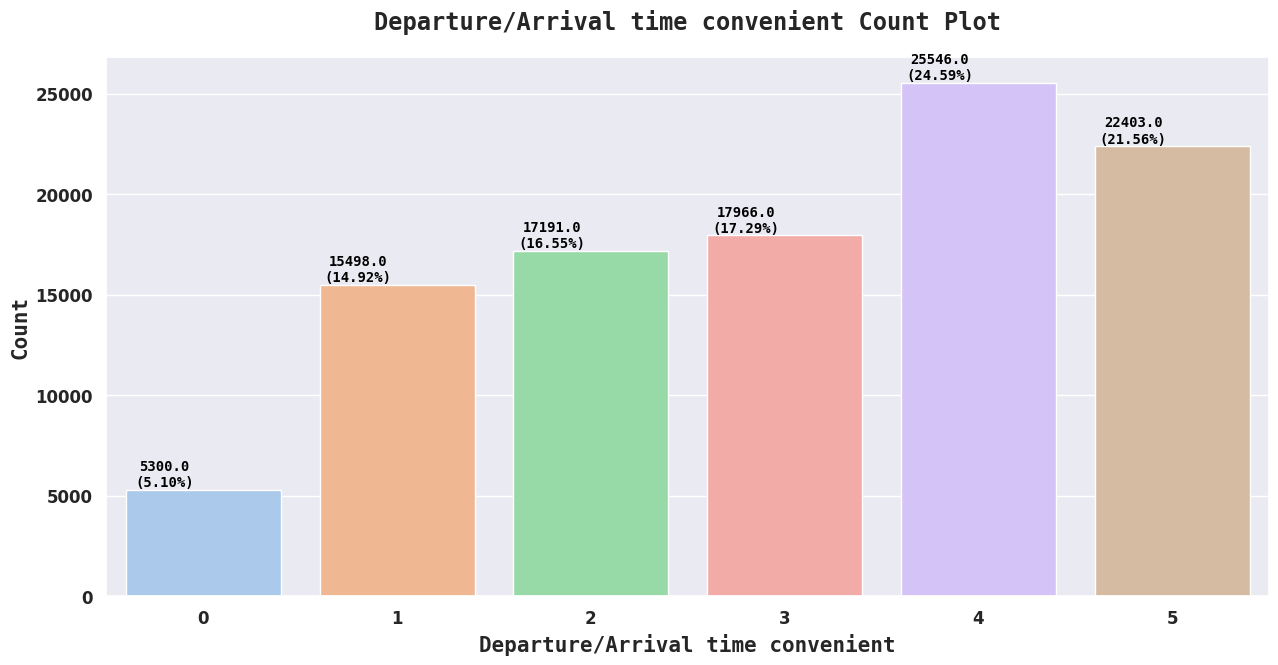

In [ ]:
count(data, "Departure/Arrival time convenient")

Most People are level 4 or 5 satisfication with Departure and Arrival Time.

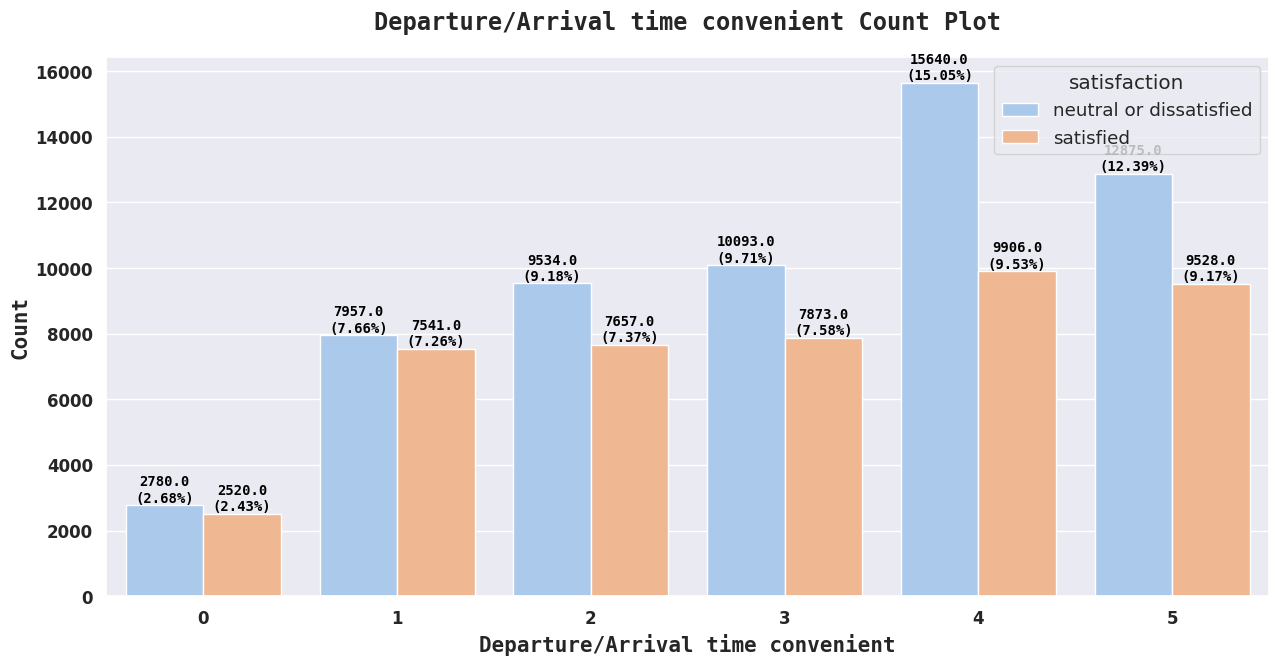

In [ ]:
count(data, "Departure/Arrival time convenient", hue = "satisfaction")

### Services rate

In [ ]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Total Delay in Minutes', 'satisfaction'],
      dtype='object')

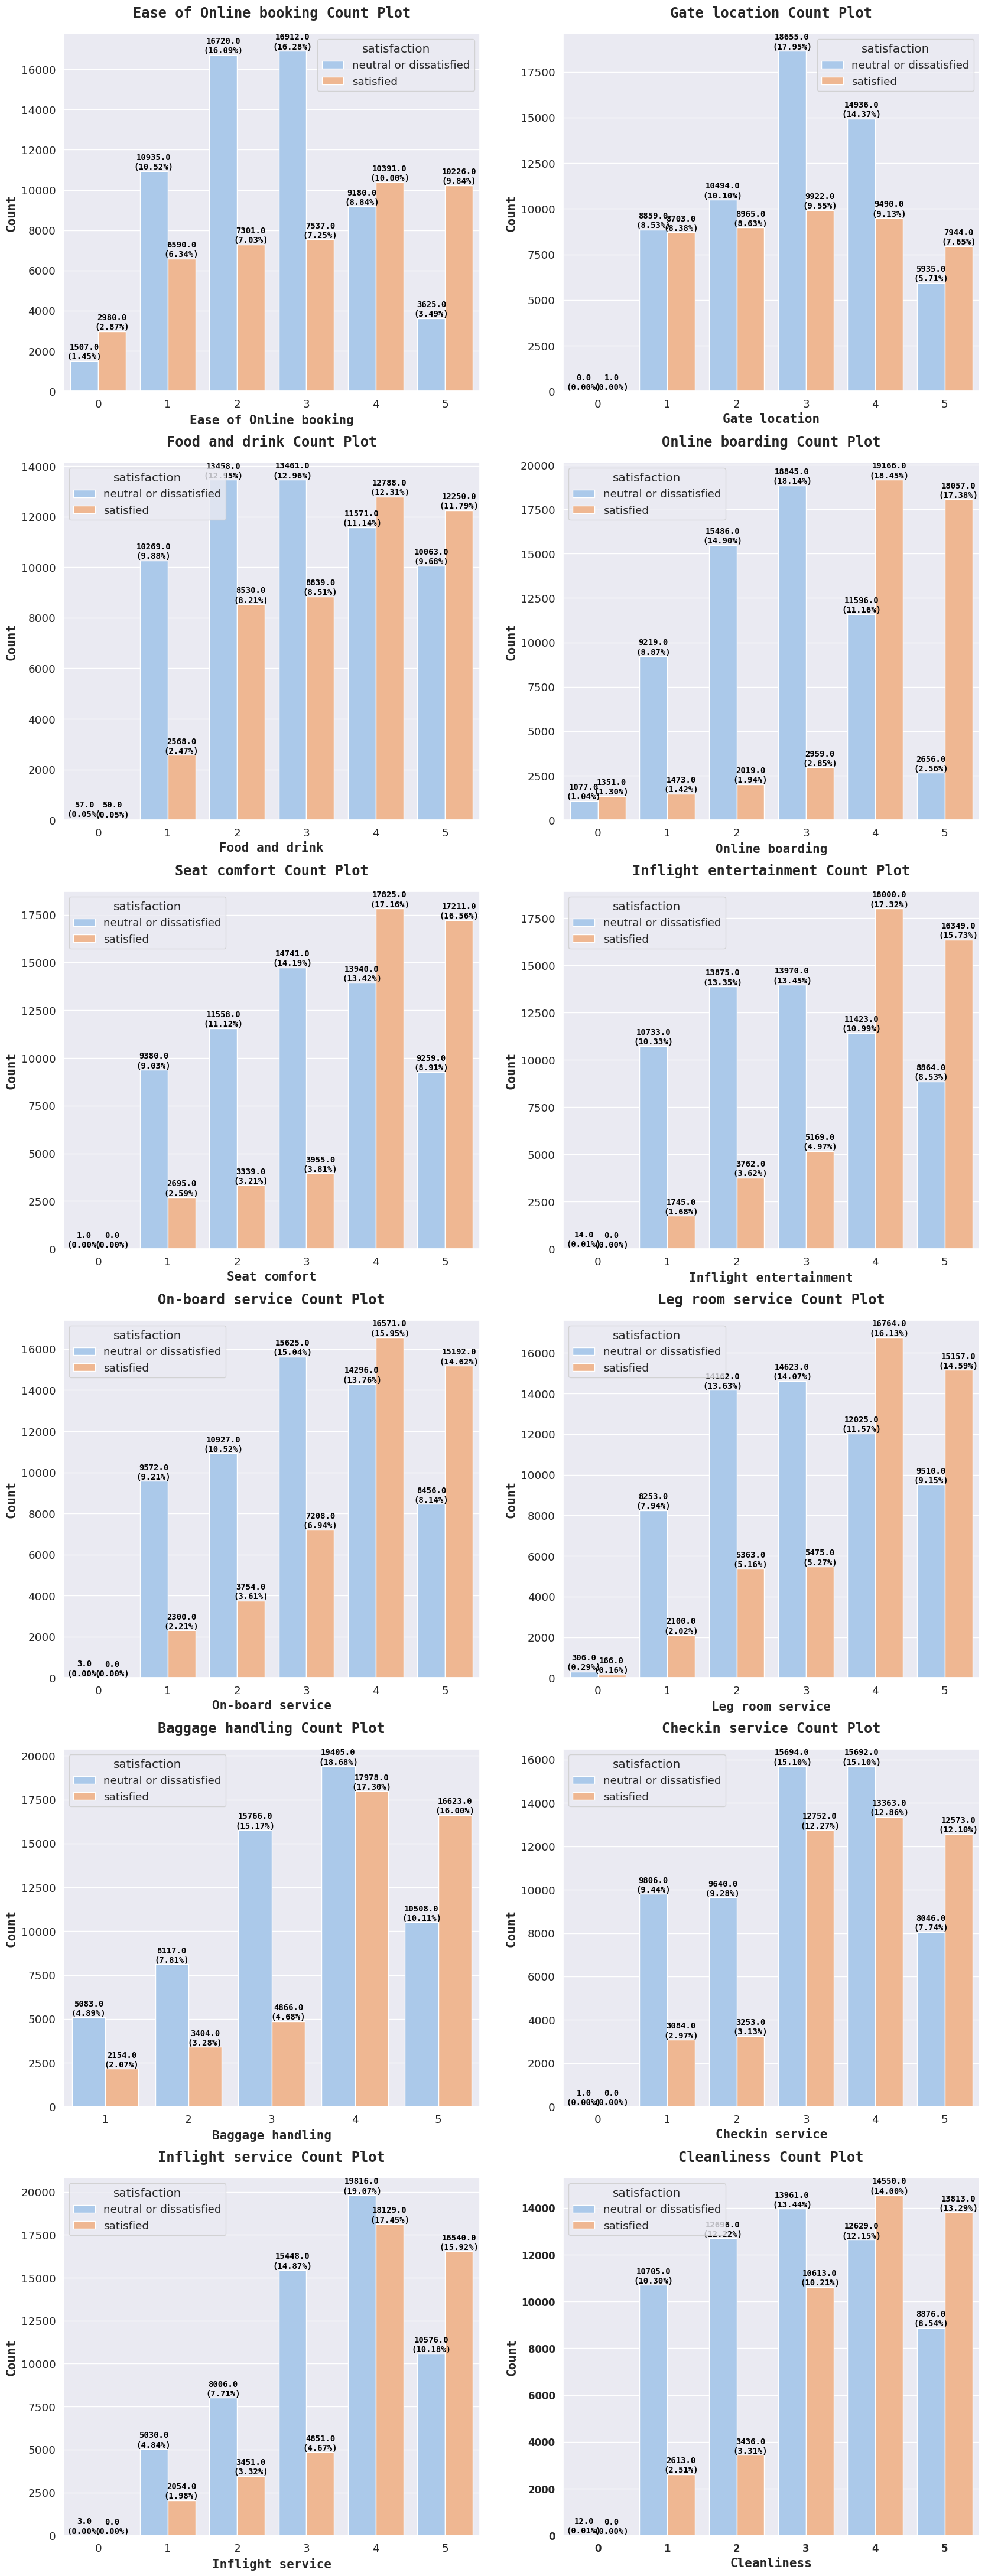

In [ ]:
services = ['Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

fig, ax = plt.subplots(6, 2, figsize = (20, 55))

for i, service in enumerate(services):
    count(data, service, hue = "satisfaction", ax = ax[i // 2, i % 2])
plt.show()

Most services have rate 4 as the most frequent value.

##Sposób 3

Female    52727
Male      51177
Name: Gender, dtype: int64


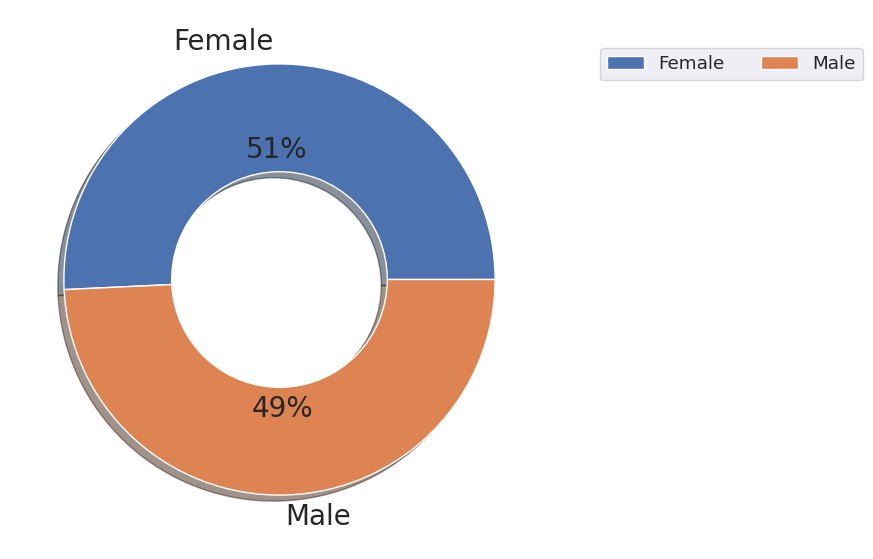

In [ ]:
## How many males and females were travelling
g=data["Gender"].value_counts()
print(g)
plt.pie(g,labels=data["Gender"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.5},textprops={"fontsize":20})
plt.legend(loc="center right",bbox_to_anchor=(1.6, 0.9),ncol=2);

Depicts the data across gender distribution is approimately balanced data set. 50.7% of female and 49.3 % of male data involved for the analysis

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


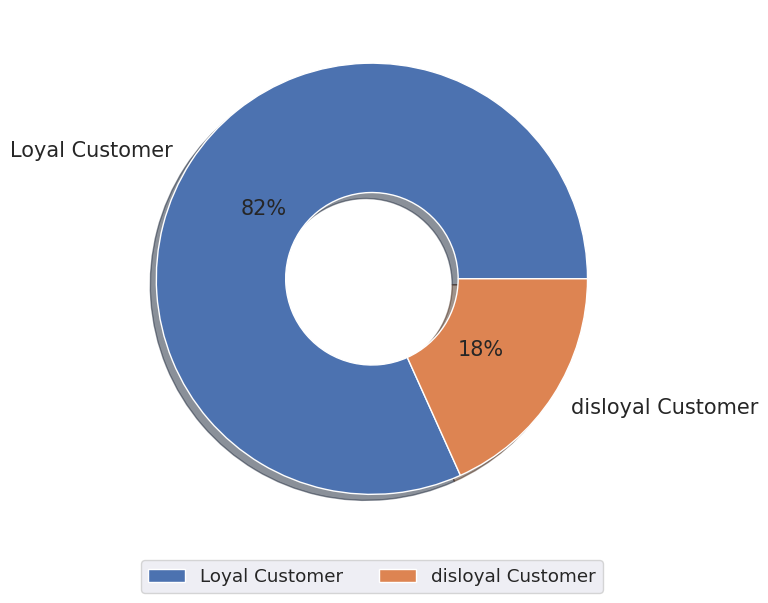

In [ ]:
c=data["Customer Type"].value_counts()
print(c)
plt.pie(c,labels=data["Customer Type"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

Overall we have more loyal customer data in this survey

In [ ]:
## What were the avg, min and max age group travelling 
data["Age"].agg(["mean","min","max"]).to_frame()

Age
mean  39.379706
min    7.000000
max   85.000000

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


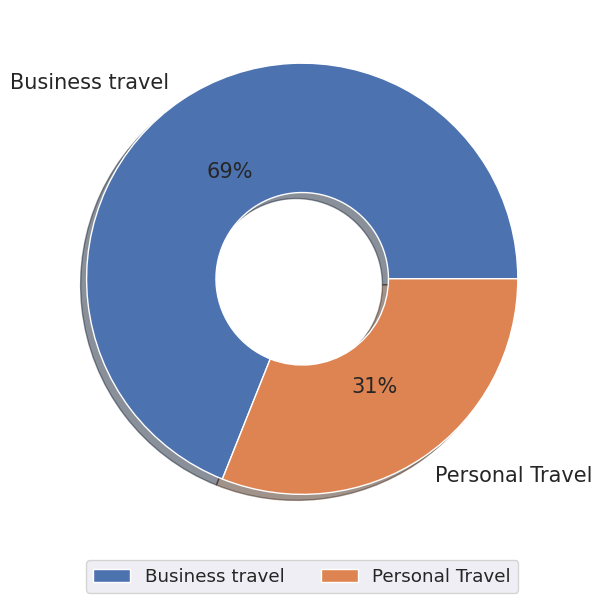

In [ ]:
# Which type of travel were frequend
t=data["Type of Travel"].value_counts()
print(t)
plt.pie(t,labels=data["Type of Travel"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


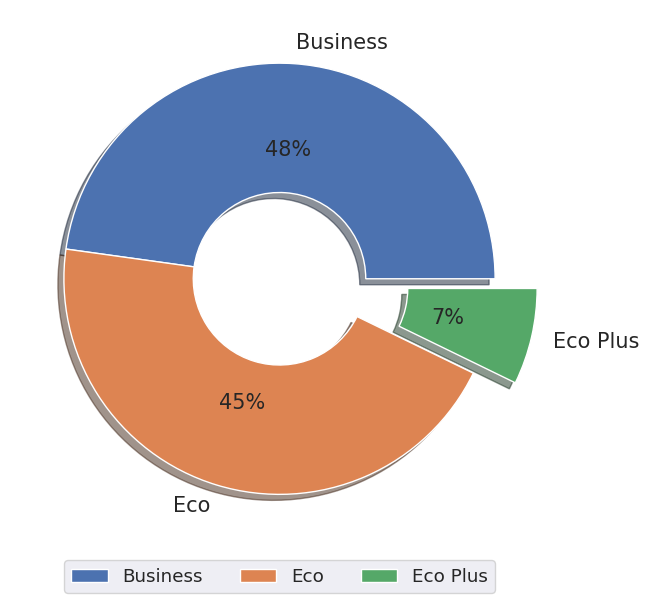

In [ ]:
## Which class travellers were most 
c=data["Class"].value_counts()
print(c)
plt.pie(c,labels=data["Class"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15},explode=[0,0,0.2])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3)

Look like more people are travelling in business class compared to economic class

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


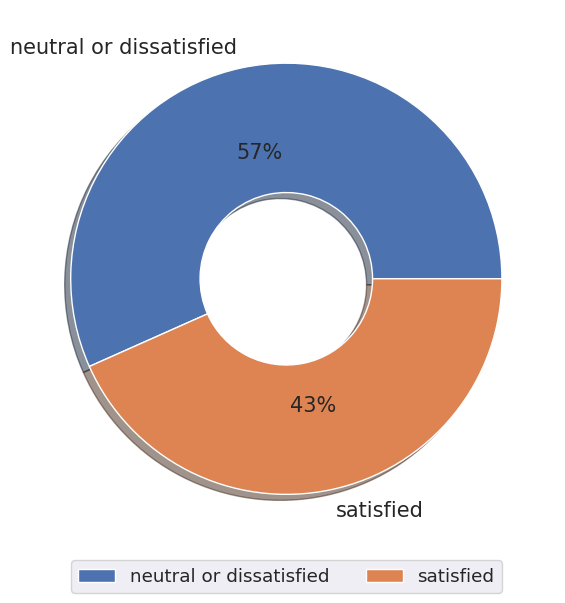

In [ ]:
## Which type of satisfaction rating are mostly given by customers
s=data["satisfaction"].value_counts()
print(s)
plt.pie(s,labels=data["satisfaction"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


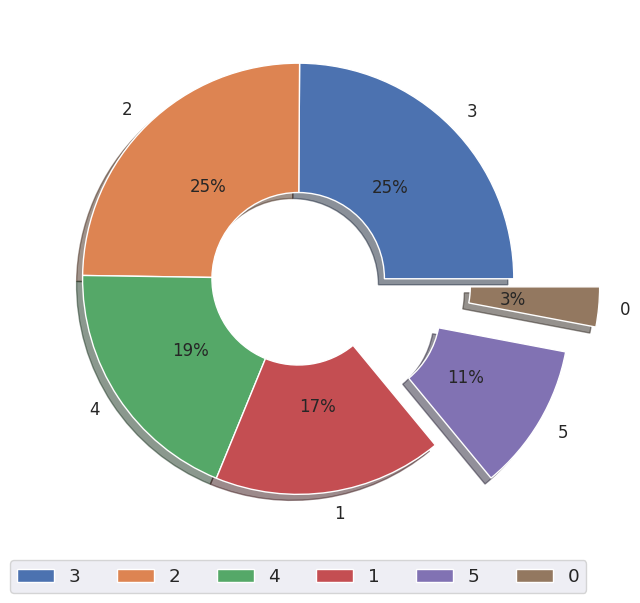

In [ ]:
## Wifi service rating by the customer
w=data["Inflight wifi service"].value_counts()
print(w)
plt.pie(w,labels=data["Inflight wifi service"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0,0.3,0.4])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

Mostly rating 3 and 2 were given by the cutomers and very few have given 5 and 0

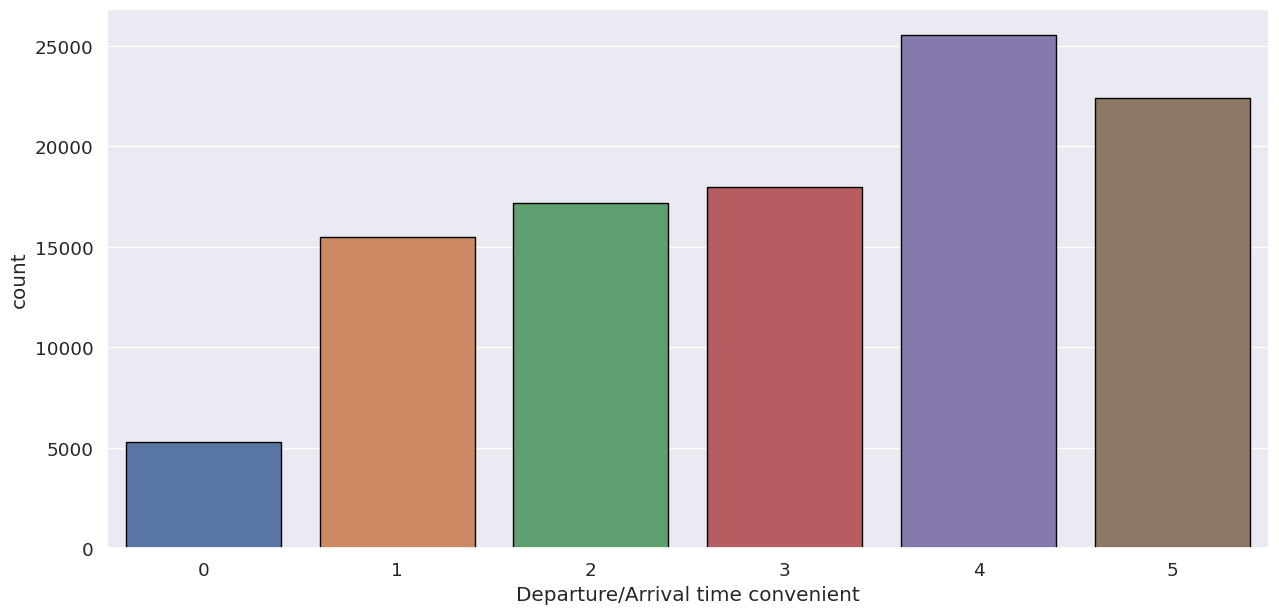

In [ ]:
## What were the Departure/Arrival time convenient rating given by the customers
sns.countplot(x="Departure/Arrival time convenient",data=data,edgecolor="black");

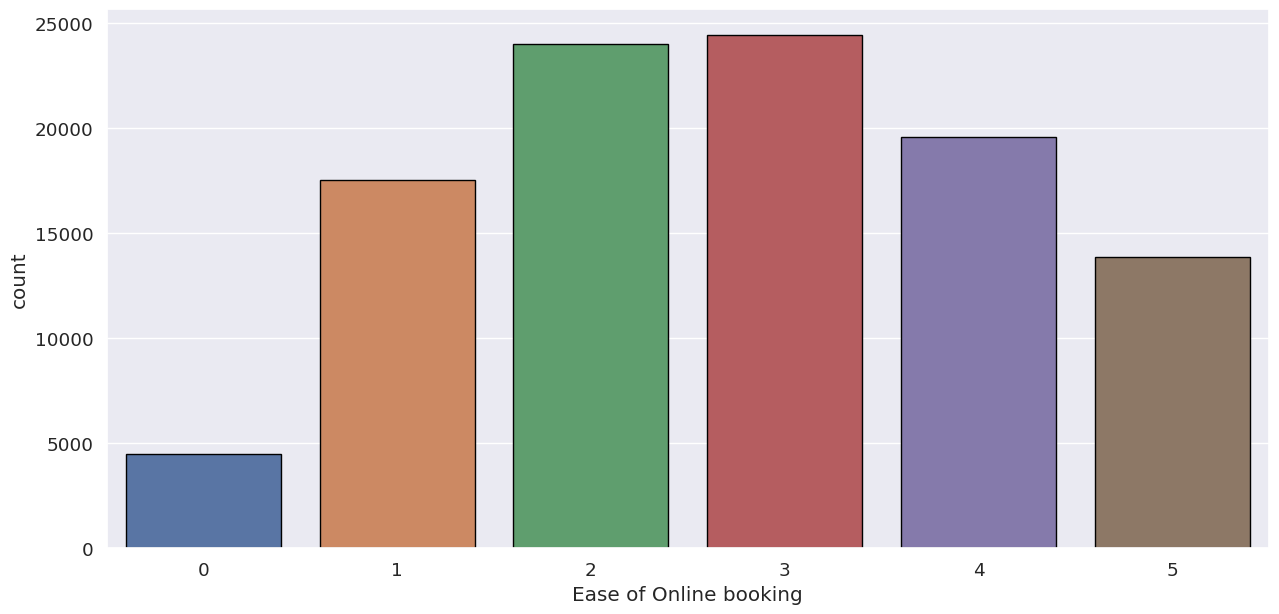

In [ ]:
## What were the Ease of Online booking rating given by the customers
sns.countplot(x="Ease of Online booking",data=data,edgecolor="black");

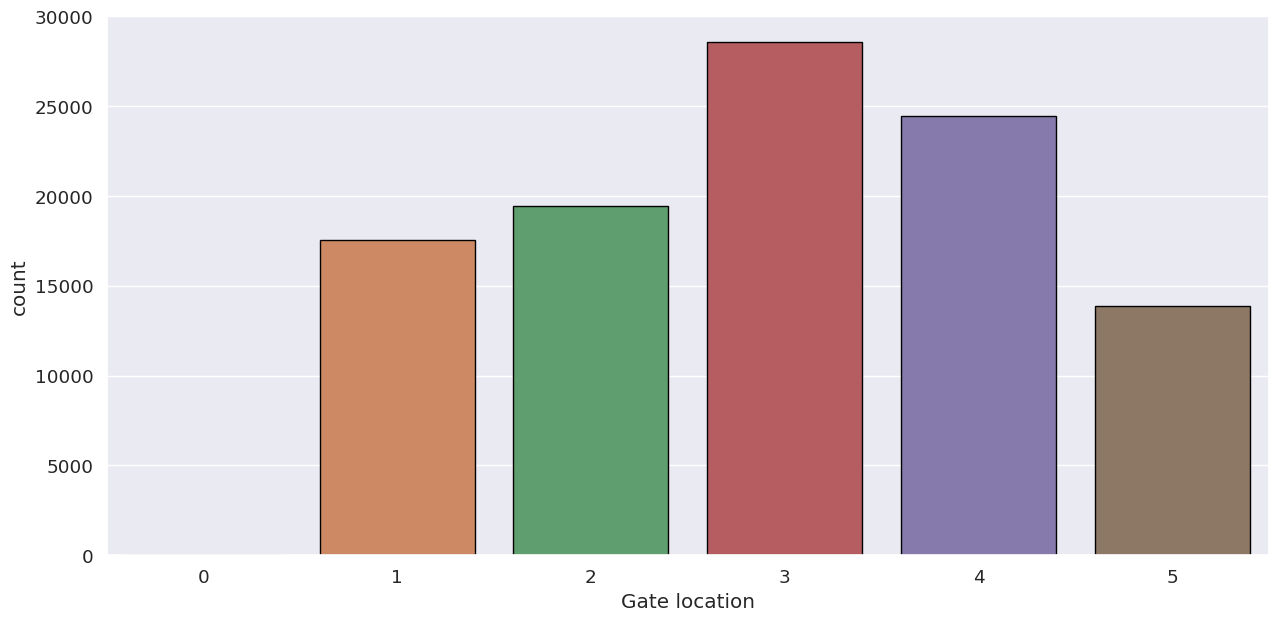

In [ ]:
# what was the satisfaction of Gate location
sns.countplot(x="Gate location",data=data,edgecolor="black");

In [ ]:
# What was the Satisfaction level of Cleanliness
sns.countplot(x="Cleanliness",data=data,edgecolor="black");

In [ ]:
# what was the satisfaction of Food and drink
sns.countplot(x="Food and drink",data=data,edgecolor="black");

In [ ]:
# what was the Satisfaction level of online boarding
sns.countplot(x="Online boarding",data=data,edgecolor="black");

In [ ]:
# What was the Satisfaction level of Seat comfort
sns.countplot(x="Seat comfort",data=data,edgecolor="black");

In [ ]:
# What was the Satisfaction level of inflight entertainment
sns.countplot(x="Inflight entertainment",data=data,edgecolor="black");

In [ ]:
# what was the Satisfaction level of On-board service
sns.countplot(x="On-board service",data=data,edgecolor="black");

In [ ]:
# What was the Satisfaction level of Leg room service
sns.countplot(x="Leg room service",data=data,edgecolor="black");

In [ ]:
## What was the Satisfaction level of baggage handling
b=data["Baggage handling"].value_counts()
print(b)
plt.pie(b,labels=data["Baggage handling"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0.3,0.4])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

In [ ]:
# What was the Satisfaction level of Check-in service
ch=data["Checkin service"].value_counts()
print(ch)
plt.pie(ch,labels=data["Checkin service"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0,0.3,0.9])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

In [ ]:
# What wast the Satisfaction level of inflight service
inn=data["Inflight service"].value_counts()
print(inn)
plt.pie(inn,labels=data["Inflight service"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0,0.3,0.9])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

In [ ]:
# Which Age category were travellers
print(data["Age_category"].value_counts())
sns.countplot(x="Age_category",data=data,edgecolor="black");

In [ ]:
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(data["Departure Delay in Minutes"],data["Arrival Delay in Minutes"],edgecolors="black")

They both are related to each other if departure delays the arrival delays also increases

In [ ]:
## Which Category of male and female are customers types
data.groupby(["Gender","Age_category"])["Customer Type"].value_counts()

In [ ]:
sns.countplot(x="Age_category",hue="Customer Type",data=data,edgecolor="black")

In [ ]:
# Which gender and category prefer to do which type of travel
print(data.groupby(["Gender","Age_category"])["Type of Travel"].value_counts())
sns.countplot(x="Age_category",hue="Type of Travel",data=df,edgecolor="black");

In [ ]:
# Which gender use to do which type of travel
print(df.groupby(["Gender"])["Class"].value_counts())
sns.countplot(x="Gender",hue="Class",data=data,edgecolor="black");

In [ ]:
## What was the maximum min and avg Flight Distance
data["Flight Distance"].agg(["mean","min","max"]).reset_index()

In [ ]:
## Which Gender was more satisfied with the flight
data.groupby("Gender")["satisfaction"].value_counts()
sns.countplot(x="Gender",hue="satisfaction",data=data,edgecolor="black");
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),ncol=6);

In [ ]:
# Which type of flights mostly delayed
sns.boxplot(x="Class",y="Departure Delay in Minutes",data=data);

## Sposób 4

In [ ]:
pip install pandas_profiling

In [ ]:
import pandas_profiling
profile= pandas_profiling.ProfileReport(data)
profile.to_file('file.html')

profile

# 3. Data Celaning

Wypełniani brakujących wartości - informacja z EDA

In [26]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [86]:
columns_with_nulls_idx = data.isna().any(axis=0)
columns_with_nulls = data.columns[columns_with_nulls_idx]
columns_with_nulls

Index(['Arrival Delay in Minutes', 'Total Delay in Minutes'], dtype='object')

In [34]:
# Bralujące dane
data.loc[data['Arrival Delay in Minutes'].isna(), :]

Gender      Customer Type  Age   Type of Travel     Class  \
213     Female     Loyal Customer   38  Business travel       Eco   
1124      Male     Loyal Customer   53  Personal Travel       Eco   
1529      Male     Loyal Customer   39  Business travel  Business   
2004    Female  disloyal Customer   26  Business travel  Business   
2108    Female     Loyal Customer   24  Personal Travel       Eco   
...        ...                ...  ...              ...       ...   
102067    Male     Loyal Customer   49  Personal Travel  Eco Plus   
102384    Male     Loyal Customer   58  Business travel       Eco   
102552  Female  disloyal Customer   29  Business travel       Eco   
102960    Male     Loyal Customer   58  Business travel       Eco   
103540  Female     Loyal Customer   33  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
213                 109                      5   
1124               1012                      3   
1529                733                      2   
2004               1035                      3   
2108                417                      2   
...                 ...                    ...   
102067             1249                      2   
102384              733                      3   
102552             1107                      2   
102960             1088                      4   
103540              359                      4   

        Departure/Arrival time convenient  Ease of Online booking  \
213                                     3                       3   
1124                                    2                       3   
1529                                    5                       5   
2004                                    3                       3   
2108                                    1                       2   
...                                   ...                     ...   
102067                                  5                       2   
102384                                  3                       3   
102552                                  1                       1   
102960                                  4                       1   
103540                                  4                       4   

        Gate location  Food and drink  Online boarding  Seat comfort  \
213                 3               5                5             5   
1124                4               4                3             4   
1529                5               2                4             3   
2004                1               2                3             2   
2108                2               5                2             5   
...               ...             ...              ...           ...   
102067              3               2                3             3   
102384              3               3                3             3   
102552              1               5                1             3   
102960              1               5                4             5   
103540              3               4                4             4   

        Inflight entertainment  On-board service  Leg room service  \
213                          5                 5                 2   
1124                         4                 4                 4   
1529                         2                 2                 2   
2004                         2                 3                 3   
2108                         5                 1                 4   
...                        ...               ...               ...   
102067                       3                 4                 5   
102384                       3                 3                 1   
102552                       5                 4                 1   
102960                       5                 1                 5   
103540                       4                 3                 2   

        Baggage handling  Checkin service  

## Imputacja danych

Udało się zidentyfikować wartości brakujące w naszej ramce danych, które należy uzupełnić. W przypadku naszych danych możemy założyć, że braki nie niosą ze sobą żadnej istotnej informacji (MCAR - Missing completely at random). Dlatego możemy je uzupełnić wartością średnią.

Rodzaje braków danych opisano: displayr.com/different-types-of-missing-data/ - bibliografia

W przypadku naszych danych możemy założyć, że braki nie niosą ze sobą żadnej istotnej informacji (MCAR) i możemy je uzupełnić w konwencjonalny sposób. W przypadku danych numerycznych uzupełnimy je średnią, natomiast dane kategoryczne uzupełnimy najczęściej występującą wartością. Dlaczego taka strategia ma sens:
* jeżeli nic nie wiemy o naszym braku to, o ile pochodzi on z tego samego rozkładu co pozostałe dane, najmniej pomylimy się estymując go średnią/najczęściej występującą wartością

In [52]:
df = data.copy()

In [53]:
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

Brakujące wartosci - 310 - koulmna Arrival Delay in Minutes

In [37]:
from sklearn.impute import SimpleImputer

In [54]:
arriv_delay_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # może mediana ?
df['Arrival Delay in Minutes'] = arriv_delay_imputer.fit_transform(data[['Arrival Delay in Minutes']])

In [55]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Porówanie danych przed i po imputacji

In [56]:
data.loc[213]

Gender                                        Female
Customer Type                         Loyal Customer
Age                                               38
Type of Travel                       Business travel
Class                                            Eco
Flight Distance                                  109
Inflight wifi service                              5
Departure/Arrival time convenient                  3
Ease of Online booking                             3
Gate location                                      3
Food and drink                                     5
Online boarding                                    5
Seat comfort                                       5
Inflight entertainment                             5
On-board service                                   5
Leg room service                                   2
Baggage handling                                   4
Checkin service                                    1
Inflight service                              

In [57]:
df.loc[213]

Gender                                        Female
Customer Type                         Loyal Customer
Age                                               38
Type of Travel                       Business travel
Class                                            Eco
Flight Distance                                  109
Inflight wifi service                              5
Departure/Arrival time convenient                  3
Ease of Online booking                             3
Gate location                                      3
Food and drink                                     5
Online boarding                                    5
Seat comfort                                       5
Inflight entertainment                             5
On-board service                                   5
Leg room service                                   2
Baggage handling                                   4
Checkin service                                    1
Inflight service                              

## Szukanie outlierów

<Axes: xlabel='Flight Distance', ylabel='Count'>

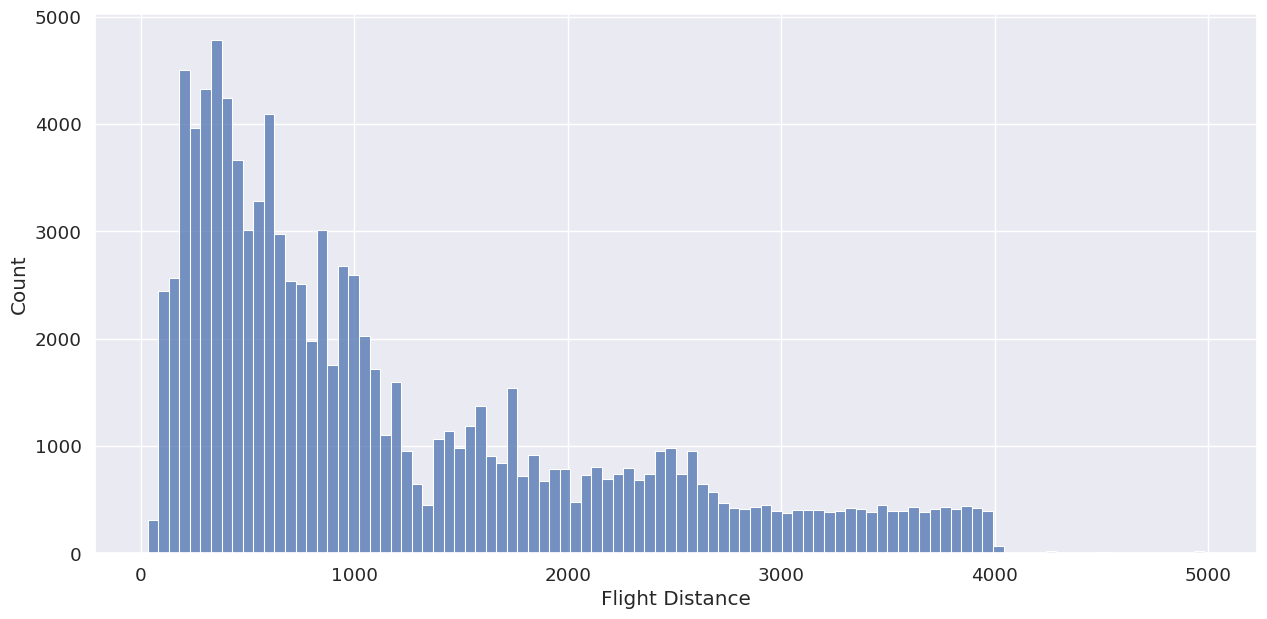

In [59]:
sns.histplot(data=df, x='Flight Distance', bins=100) # wykres dla zmiennych numerycznych

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <A

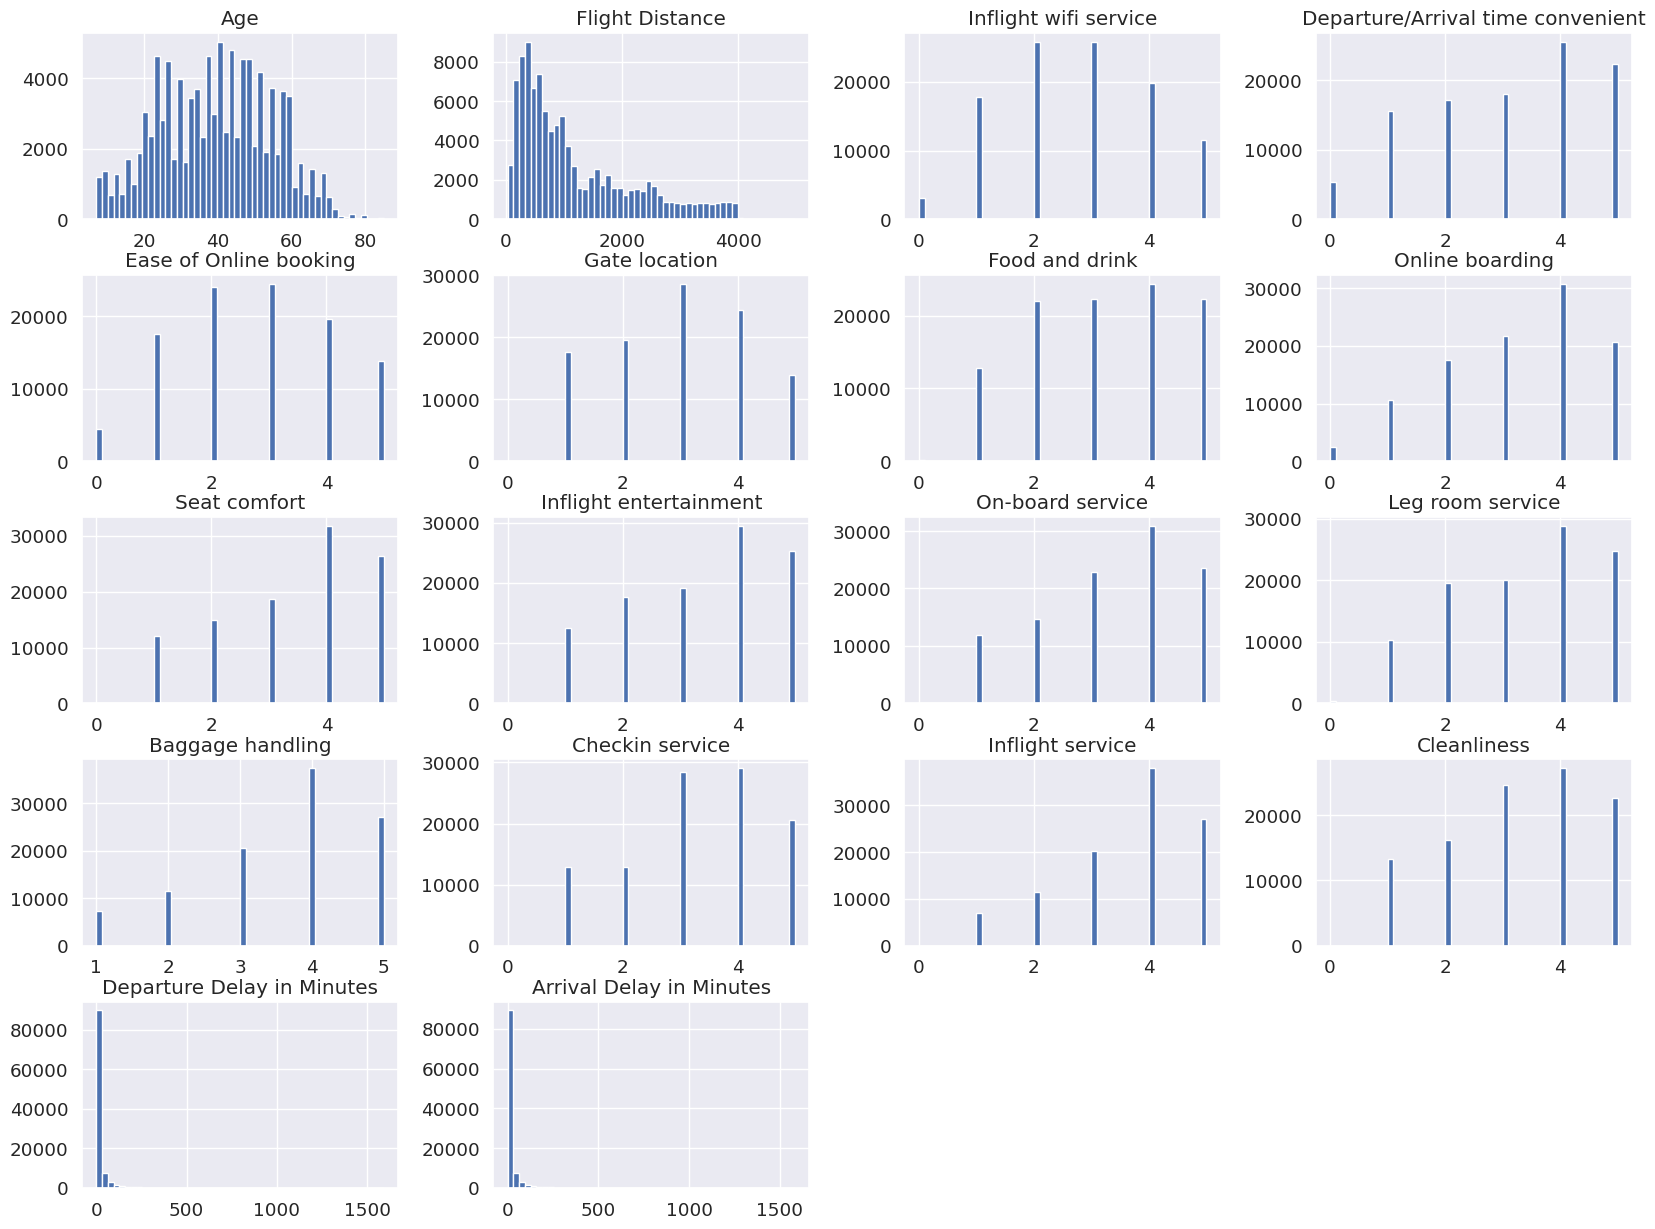

In [61]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

Nie ma outlierów

## Korelacja danych

In [65]:
import plotly.express as px

In [66]:
corr=data.corr()
fig = px.imshow(corr, text_auto=True,width=1200,height=1200)
fig.show()

<ipython-input-66-75d9975a4485>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


Wypisać inne korelacje widoczne na powyższym wykresie

Potwierdzenie korelacji opóźnień

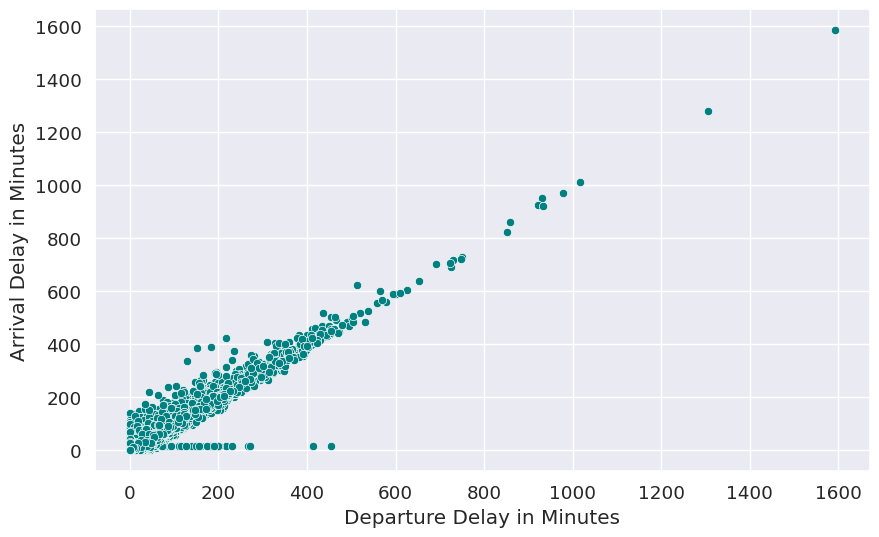

In [68]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, color = 'teal')
plt.show()

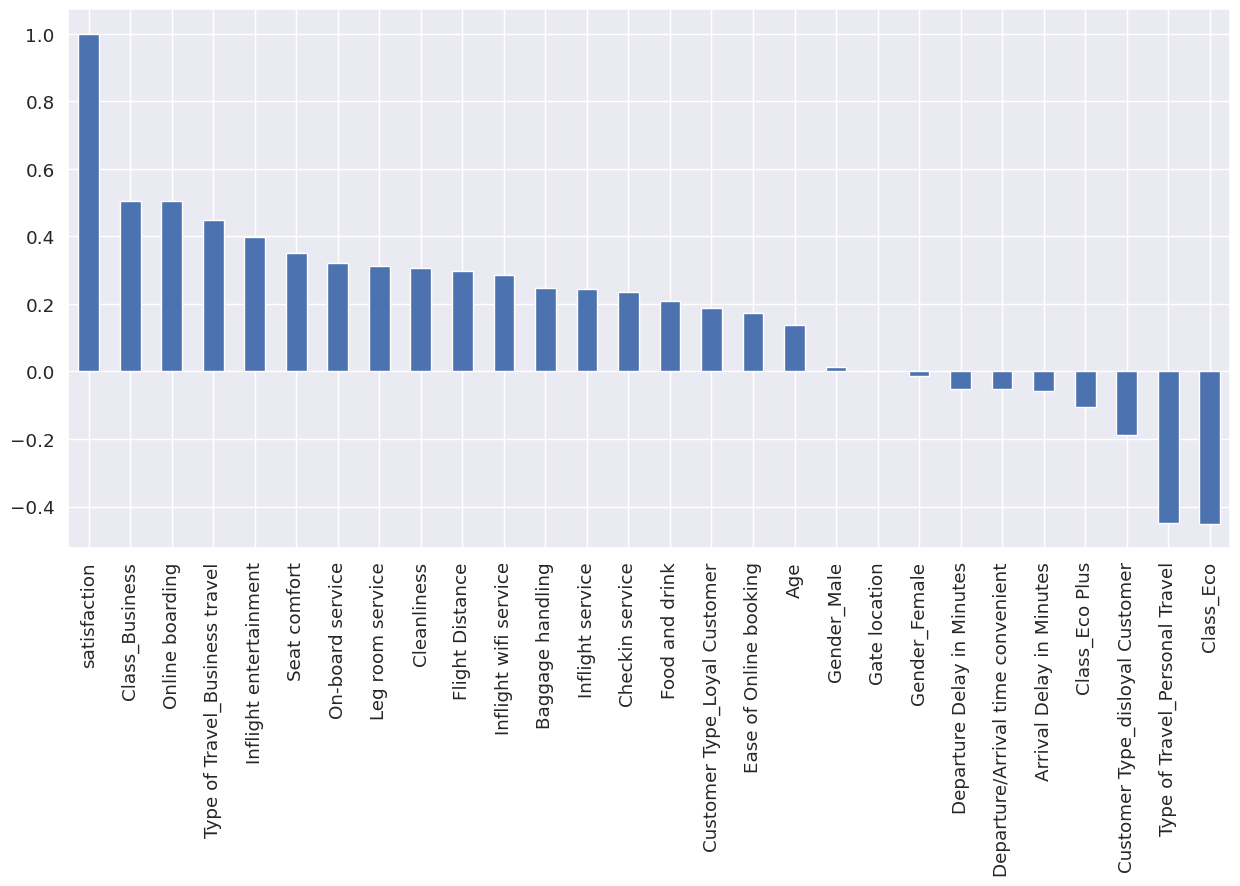

In [76]:
# I will look into correlations with Satisfaction column

df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
test_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
df_dummies = pd.get_dummies(df)
df_dummies.corr()['satisfaction'].sort_values(ascending = False).plot(kind='bar')
plt.show()

Positively Correlated
- Business Class ,online boarding and Business travels are strong reasons for people satisfaction.
Negatively Correlated
- Personal Travels and Economy Class results in Unsatisfaction.

## TWOJE 

Czy macierz korelacji nie starczy ?

### Szukanie zależności między atrybutami

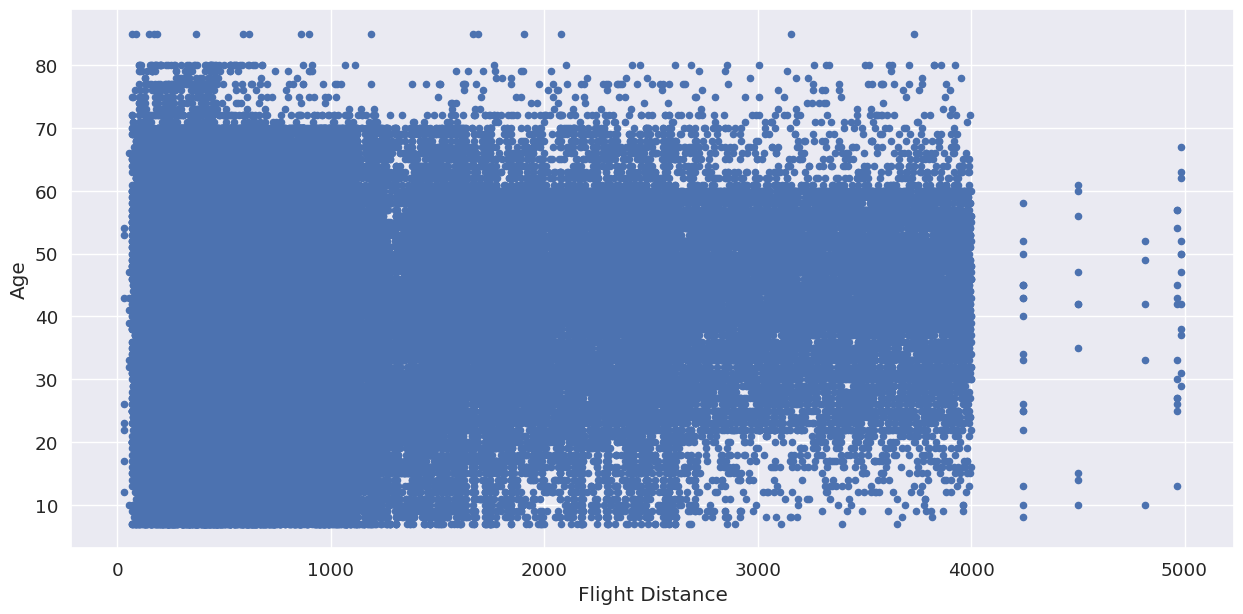

In [77]:
df.plot(kind='scatter', x='Flight Distance', y='Age')
plt.show()

### Próbkowanie danych:
Dokonano próbkowania danych, wybierając co kilka wartość lub losowo wybierając podzbiór danych. Użyto metody sample() na ramce danych, aby wylosować określoną liczbę próbek

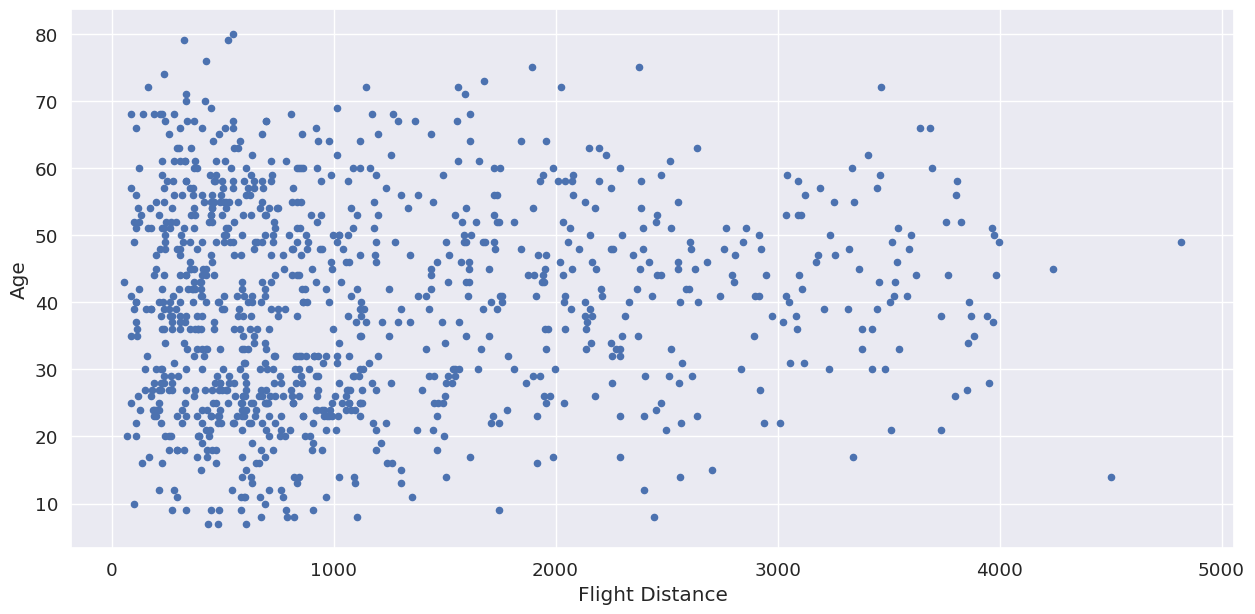

In [78]:
sampled_df = df.sample(n=1000)  # Wylosuj 1000 próbek z ramki danych
sampled_df.plot(kind='scatter', x='Flight Distance', y='Age')
plt.show()

### Wykorzystanie agregacji:
Wykorzystano agregację, aby obliczyć statystyki, takie jak średnia, mediana, minimum lub maksimum dla różnych przedziałów wartości atrybutów:

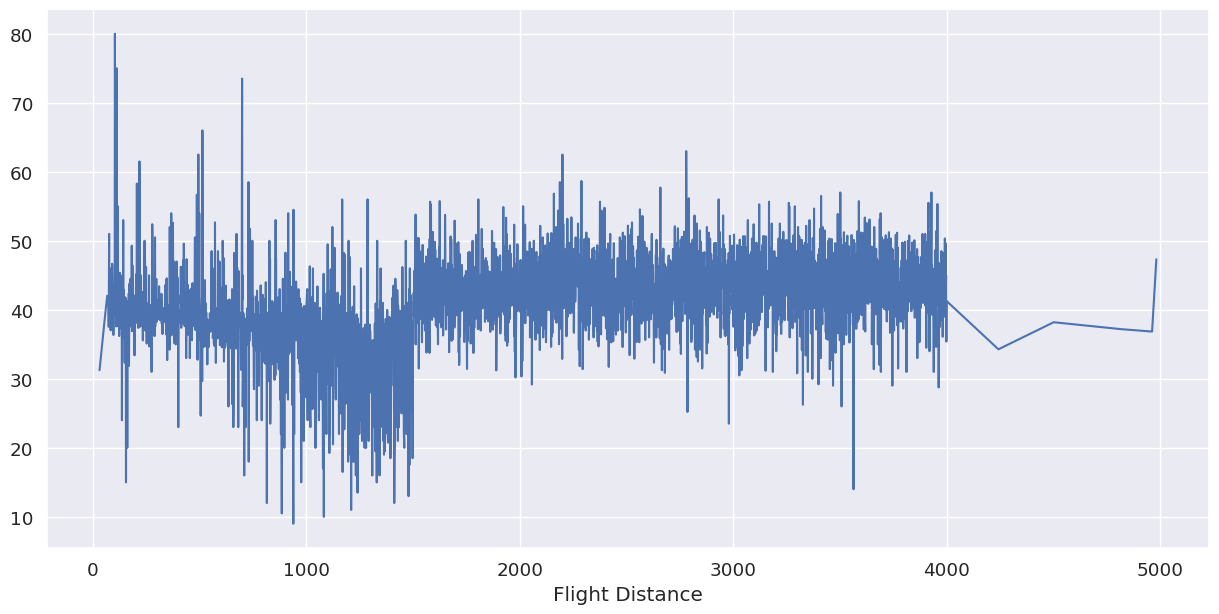

In [79]:
aggregated_df = df.groupby('Flight Distance')['Age'].mean()  # Oblicz średnią dla każdej wartości Flight Distance
aggregated_df.plot(kind='line')
plt.show()

### Wykres gęstości:
Zamiast wykresu punktowego, wykorzystano wykres gęstości, który pokazuje rozkład wartości atrybutów:

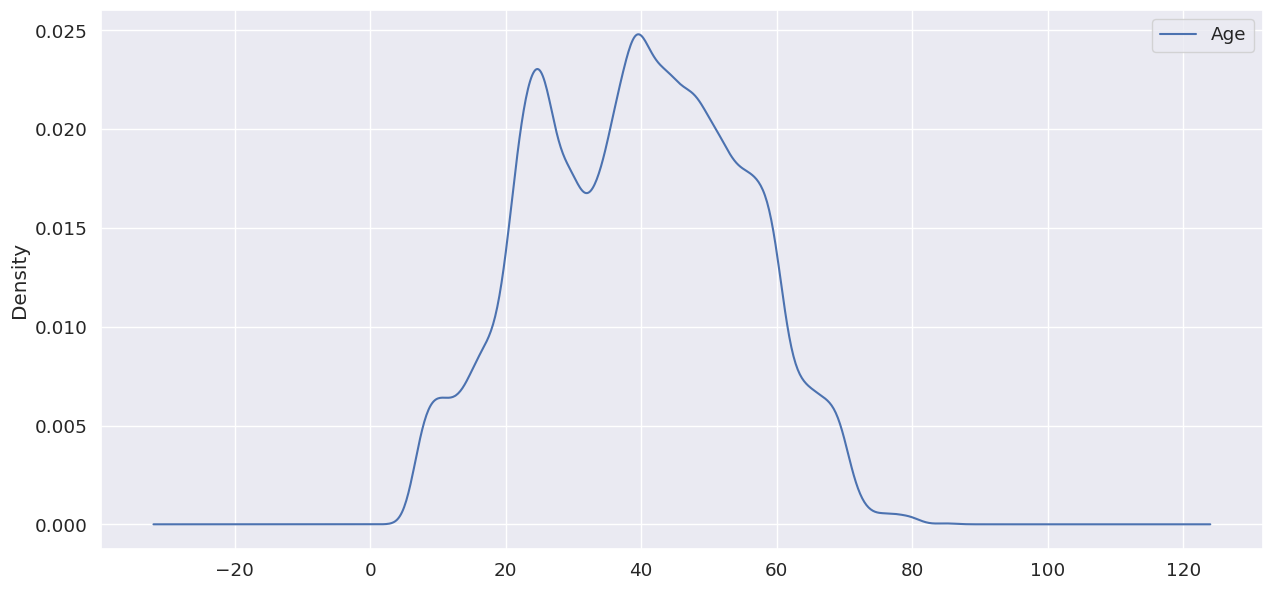

In [80]:
df.plot(kind='density', x='Flight Distance', y='Age')
plt.show()

## Sprawdzenie duplikatów

In [58]:
df.duplicated().sum()

0

## Usuniecie nipotrzebnych kolumn

In [81]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)

KeyError: ignored

In [84]:
# 5.2 Propozycja nowych argumentów

# Nowa kolumna
new_column = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']

# Indeks, na który zostanie wstawiona nowa kolumna (przedostatnie miejsce)
index = len(data.columns) - 1

# Wstawienie nowej kolumny
data.insert(index, 'Total Delay in Minutes', new_column)

data.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

   Total Delay in Minutes             satisfaction  
0                    43.0  neutral or dissatisfied  
1                     7.0  neutral or dissatisfied  
2                     0.0                satisfied  
3                    20.0  neutral or dissatisfied  
4                     0.0                satisfied

## Kodowanie zmiennych kategorycznych

Kolejnym krokiem w przygotowywaniu naszych danych jest zamiana zmiennych kategorycznych na liczbowe. Dlaczego taka zmiana jest potrzebna?
* modele uczenia maszynowego to skomplikowane funkcje matematyczne - potrzebują liczb jako argumentów
* czasami zmienne kateogryczne mają swój naturalny porządek (np. mały - średni - duży); odpowiednie kodowanie dostarczy modelowi informacji o tym porządku
* popularne biblioteki do uczenia maszynowego w **Pythonie** (np. używany na tych warsztatach `sklearn`) zwykle nie wspierają wartości kategorycznych

OneHotEncoding

In [97]:


# Kolumny kategoryczne
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
for col in cat_columns:
  print(f'Kolumna ({col}) - wartości: {data[col].unique()}')
print()
print(data[cat_columns].nunique())

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

Kolumna (Gender) - wartości: ['Male' 'Female']
Kolumna (Customer Type) - wartości: ['Loyal Customer' 'disloyal Customer']
Kolumna (Type of Travel) - wartości: ['Personal Travel' 'Business travel']
Kolumna (Class) - wartości: ['Eco Plus' 'Business' 'Eco']
Kolumna (satisfaction) - wartości: ['neutral or dissatisfied' 'satisfied']

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


In [104]:
from tabulate import tabulate

cat_columns = data.select_dtypes(object).columns.to_list()
table = [['Column', 'Values']]

for col in cat_columns:
    unique_values = df[col].unique()
    table.append([col, unique_values])
    #print(f'Kolumna ({col}) - wartości: {unique_values}')

print(tabulate(table, headers='firstrow'))

Column          Values
--------------  --------------------------------------
Gender          ['Male' 'Female']
Customer Type   ['Loyal Customer' 'disloyal Customer']
Type of Travel  ['Personal Travel' 'Business travel']
Class           ['Eco Plus' 'Business' 'Eco']
satisfaction    [0 1]


OrdinalEncoder:
OrdinalEncoder służy do kodowania zmiennych kategorycznych na wartości liczbowe, zachowując porządek między kategoriami. Działa poprzez przypisanie unikalnych liczb całkowitych do poszczególnych kategorii. Na przykład, jeśli mamy zmienną "rozmiar" z kategoriami ["mały", "średni", "duży"], to OrdinalEncoder może przypisać wartości [0, 1, 2] odpowiednio do tych kategorii. Ważne jest zauważenie, że porządek kodowanych kategorii ma znaczenie dla tego typu kodowania.

OneHotEncoder:
OneHotEncoder jest również używany do kodowania zmiennych kategorycznych, ale tworzy ona nowe kolumny dla każdej kategorii i przypisuje wartość 1 do odpowiedniej kolumny dla danej kategorii, a 0 do pozostałych kolumn. Na przykład, dla zmiennej "kolor" z kategoriami ["czerwony", "zielony", "niebieski"], OneHotEncoder stworzyłby trzy nowe kolumny: "kolor_czerwony", "kolor_zielony" i "kolor_niebieski". Dla rekordu z kategorią "zielony", w kolumnie "kolor_zielony" zostanie przypisana wartość 1, a w pozostałych kolumnach zostaną przypisane wartości 0.

W skrócie, OrdinalEncoder przypisuje wartości liczbowe zachowując porządek między kategoriami, podczas gdy OneHotEncoder tworzy nowe kolumny, aby reprezentować poszczególne kategorie jako wartości binarne. Wybór między nimi zależy od kontekstu danych i rodzaju analizy, którą zamierzamy przeprowadzić.

In [105]:
from sklearn.preprocessing import OrdinalEncoder

# Utworzenie enkodera
one_hot_encoder = OrdinalEncoder(
    sparse_output=False, handle_unknown="ignore"
).set_output(transform="pandas")

TypeError: ignored

In [89]:
# Zakodowanie zmiennych kategorycznych
categorical_columns = df.select_dtypes("object").columns
one_hot_encoded_train = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_encoded_test = one_hot_encoder.transform(df[categorical_columns])

In [ ]:
data = pd.concat([train, test])
le = LabelEncoder()
for col in cat_cols:
    le.fit(data[col])
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

y_label = LabelEncoder()    
for col in y_col:
    y_label.fit(data[col])
    train[col] = y_label.transform(train[col])
    test[col] = y_label.transform(test[col]) 

In [ ]:
train.head()

In [ ]:
test.head()

In [106]:
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
data['Class'] = data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


test_data['Gender'] = test_data['Gender'].map({'Male' : 0, 'Female' : 1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test_data['Class'] = test_data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [120]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder



# Konwersja za pomocą OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded_data = ordinal_encoder.fit_transform(df)

# Konwersja za pomocą OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_data = onehot_encoder.fit_transform(df)

# Wyświetlanie wyników
print("OrdinalEncoder:")
print(ordinal_encoded_data)

print("\nOneHotEncoder:")
print(onehot_encoded_data)

OrdinalEncoder:
[[1. 0. 0.]
 [2. 2. 1.]
 [1. 1. 0.]
 [0. 0. 2.]
 [2. 1. 2.]]

OneHotEncoder:
[[0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



## Modeling

In [109]:
# tools
from sklearn.model_selection import train_test_split # to split the data as obvious
from sklearn.preprocessing import StandardScaler # to scale our features
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix,\
roc_curve
from sklearn.model_selection import cross_val_predict

In [111]:
X_train_full = data.drop('satisfaction', axis = 1)
y_train_full = data.satisfaction

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data.satisfaction

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

In [ ]:
print(classification_report(y_test, y_pred))

rrrrrrrrrrrrrrrrrrrrrr

In [115]:
X_train_full = df.drop('satisfaction', axis = 1)
y_train_full = df.satisfaction

In [116]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                      test_size = 0.2, random_state = 42)

In [118]:
X_train.head()

Gender      Customer Type  Age   Type of Travel     Class  \
20921  Female     Loyal Customer   59  Personal Travel       Eco   
36897  Female  disloyal Customer   40  Business travel  Business   
8468     Male     Loyal Customer   65  Personal Travel       Eco   
53490  Female     Loyal Customer   70  Personal Travel       Eco   
78687  Female  disloyal Customer   25  Business travel       Eco   

       Flight Distance  Inflight wifi service  \
20921             1046                      4   
36897              752                      4   
8468               383                      2   
53490             2239                      3   
78687             1358                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
20921                                  5                       4   
36897                                  4                       4   
8468                                   3                       2   
53490                                  5                       3   
78687                                  2                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
20921              1               5                4             5   
36897              2               1                4             5   
8468               1               1                2             1   
53490              4               3                5             4   
78687              3               1                2             1   

       Inflight entertainment  On-board service  Leg room service  \
20921                       2                 2                 4   
36897                       1                 4                 2   
8468                        1                 5                 4   
53490                       5                 5                 3   
78687                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
20921                 3                5                 2            4   
36897                 4                3                 5            1   
8468                  5                5                 5            1   
53490                 5                3                 5            5   
78687                 3                5                 2            1   

       Departure Delay in Minutes  Arrival Delay in Minutes  
20921                          12                       3.0  
36897                          19                      29.0  
8468                            0                       0.0  
53490                           0                       0.0  
78687                           3                      15.0

In [117]:
log_reg_clf = LogisticRegression(random_state = 42, max_iter = 500)
log_reg_clf.fit(X_train, y_train)

ValueError: ignored

In [113]:
log_reg_scores = log_reg_clf.decision_function(X_valid)
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_valid, log_reg_scores)
plot_roc_curve(log_reg_fpr, log_reg_tpr)

ValueError: ignored

In [ ]:
log_reg_auc = roc_auc_score(y_valid, log_reg_scores)
log_reg_auc

In [ ]:
models.append("Logistic Regression")
auc_scores.append(log_reg_auc)